In [1]:
import pandas as pd
import os
from ROOT import TFile
from root_numpy import tree2array
from IPython.display import display
import numpy as np



from matplotlib import pyplot as plt

Welcome to JupyROOT 6.16/00


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.17.2 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


### read root files

In [2]:
def read_root_file(file):
    rfile = TFile(file) #root file
    intree = rfile.Get("Nominal") #get tree from root file
    array = tree2array(intree)
    df = pd.DataFrame(array)
    return df

## Getting dataframes from root files

In [3]:
root_file_path = "../processed_data/all_2000_full.root"
#data_file_path = "../raw_data/data.root"
df_base = read_root_file(root_file_path)
df_base = df_base.drop(['EventWeightNoXSec', 'm_AntiBTag', 'm_AntiTauTag','m_DTpt_Eff', 'm_DTeta_Eff', 
              'm_DTphi_Eff', 'm_DTm_Eff','m_DTpt_ConEff', 'm_DTeta_ConEff', 
              'm_DTphi_ConEff', 'm_DTm_ConEff', 'm_DTpt_ConVis', 'm_DTeta_ConVis', 
              'm_DTphi_ConVis', 'm_DTm_ConVis','m_hhm_Coll', 'm_hhm_Eff', 
              'm_hhm_ConEff', 'm_hhm_ConVis'], axis=1)
#df_data =read_root_file(data_file_path)
#display(df)

## Event variables

In [4]:
print(df_base.columns)

Index(['sample', 'EventWeight', 'EventNumber', 'm_region', 'm_FJNbtagJets',
       'm_FJpt', 'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi',
       'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt'],
      dtype='object')


## Filtering per region

In [5]:
def get_histogram(region_name, tag_name, feature_name, h_min, h_max,
                 stack_list, weights_list, names, signal_values, signal_weights, signal_name,
                 data_values):
    
    fig = plt.figure(figsize=(10, 10))
    grid = plt.GridSpec(5, 2, hspace=0.25)
    his = fig.add_subplot(grid[:-1, :])
    
    plt.title("{}, {} tag, {}".format(region_name,tag_name,feature_name))   
    plt.grid()
   
    n_back, bin_edges_back, patches_back = plt.hist(stack_list, range=(hmin,hmax), weights = weights_list, bins=30,
             stacked=True,histtype =  'barstacked',label=names)
    
    back_array = np.array(n_back)
    
    sum_back_per_bin = back_array.sum(axis=0)
    
    
    n_signal, bin_edges_signal,patches_signal = plt.hist(signal_values, range=(hmin,hmax), 
             weights = signal_weights, bins=30,label=signal_name,fill=False,color="red")
    bin_centres = (bin_edges_back[:-1] + bin_edges_back[1:])/2.
    
    counts_data,bin_edges_data = np.histogram(data_values,range=(hmin,hmax), 
              bins=30)
    mask_0_data = counts_data != 0
    
    new_array = (counts_data - sum_back_per_bin)/sum_back_per_bin
    
    
    
    print("DATA", counts_data)
    print("BACK", sum_back_per_bin)
    print("DIFF", new_array)
    
    plt.errorbar(bin_centres[mask_0_data], counts_data[mask_0_data],yerr=True, fmt="ok",label="data")
    plt.legend(loc="upper right")
    plt.ylabel('Events')
    
    
    mask_0_back = sum_back_per_bin != 0
    
    
    res = fig.add_subplot(grid[-1, :], sharex=his)
    plt.errorbar(bin_centres[mask_0_data], new_array[mask_0_data], xerr=False, fmt="ok")
    res.set_ylabel('(data-bkg)/bkg')
    res.set_xlabel(feature_name)
    #res.set_ylim((-3,3))
    res.grid()
    
    
    plotname = "../histograms/"+region_name+"_"+tag_name+ "_"+feature_name +".png"
    plt.savefig(plotname)  
    plt.show()

In [6]:
def get_stacks(d,feature):
    stack_list = []
    weights_list = []
    names = []
    for samp, number in d.items():
        df_per_samp = df1[df1["sample"] == samp] #dataframe containing 
                                                 #only one kind of sample
        print(samp, number, df_per_samp["EventWeight"].values.sum())
        stack_list.append(df_per_samp[feature].values)
        weights_list.append(df_per_samp["EventWeight"].values)
        names.append(samp)
    return stack_list, weights_list, names


-->df.shape (58008, 19)
::: SR 0 m_FJpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


DATA [  3  14  61 100  57  44  20  13   8   4   0   2   1   1   1   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 7.85116517e+01  2.15834572e+02  1.10014374e+03  1.88552287e+03
  1.16662947e+03  6.80144947e+02  4.82850530e+02  2.57589234e+02
  1.60314287e+02  1.02576195e+02  5.33173193e+01  3.32670513e+01
  2.37799134e+01  1.22502413e+01  5.19165799e+00  4.82109225e+00
  2.43480754e+00  2.17452407e+00  7.21370697e-01  7.60967672e-01
  4.12113190e-01  4.85549927e-01  2.83126831e-02  2.00759888e-01
  1.34887695e-01  3.05175781e-03  1.27563477e-01  9.58251953e-02
  0.00000000e+00 -6.56890869e-03]
DIFF [-0.96178911 -0.93513551 -0.9445527  -0.94696431 -0.9511413  -0.93530791
 -0.95857931 -0.94953205 -0.95009802 -0.9610046  -1.         -0.93988045
 -0.9579477  -0.91836895 -0.80738331 -0.79257812 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.                 nan -1.        ]


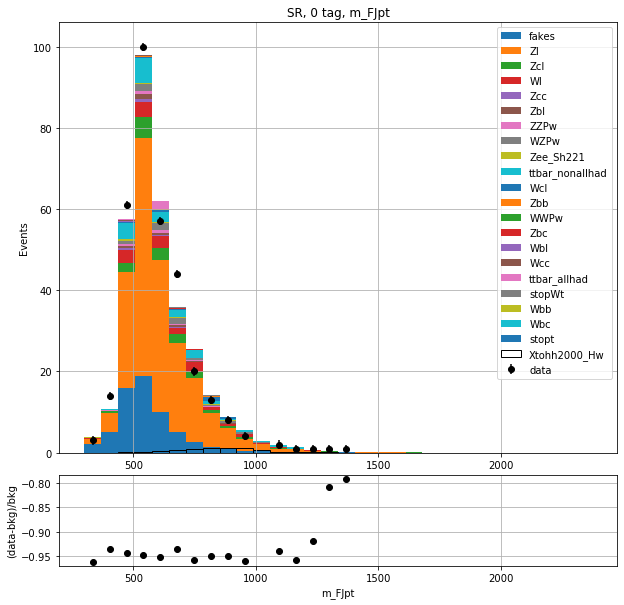

::: SR 0 m_FJeta
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [ 2  6  3  2  7 10  7 15 13 20 11 13 12 15 31 16 15 16 13 17 17 14  9  9
 11  9  6  3  4  4]
BACK [ 53.47831359  75.94174396  65.07940083 132.98829962 168.63345221
 184.8554536  198.87240716 226.76003345 244.04630695 255.77291551
 303.45465925 312.45222417 294.25030001 333.1106872  321.44484645
 319.75734979 299.3310692  296.78500515 290.15427101 276.82683185
 266.91271463 252.01728621 224.24628801 215.72016168 176.33911216
 148.85233361 111.70284182  88.76768935  80.36526397  51.41580939]
DIFF [-0.96260166 -0.92099207

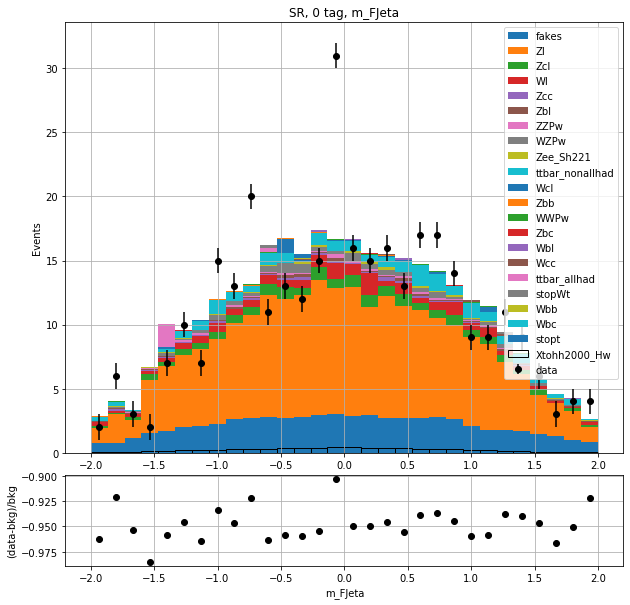

::: SR 0 m_FJphi
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [15 12 17 14 10 11 12 16  8 10 13 12  6  5  8 12 13 12 12  8  7  9 16 13
 14 14  9 11  8  3]
BACK [201.24639166 244.20879851 199.79732888 191.8452513  192.74323232
 208.88966938 181.59724049 225.35993962 211.91041934 227.59645814
 234.84011304 193.91323034 221.79154634 199.60466135 184.14495689
 161.67759347 216.49539995 215.1291932  207.0990527  212.6931314
 222.13792518 206.28665268 213.83217934 205.42355162 206.01200408
 197.79567602 207.86184686 226.42479664 200.58063889 251.41339652]
DIFF [-0.9254645  -0.95086172 

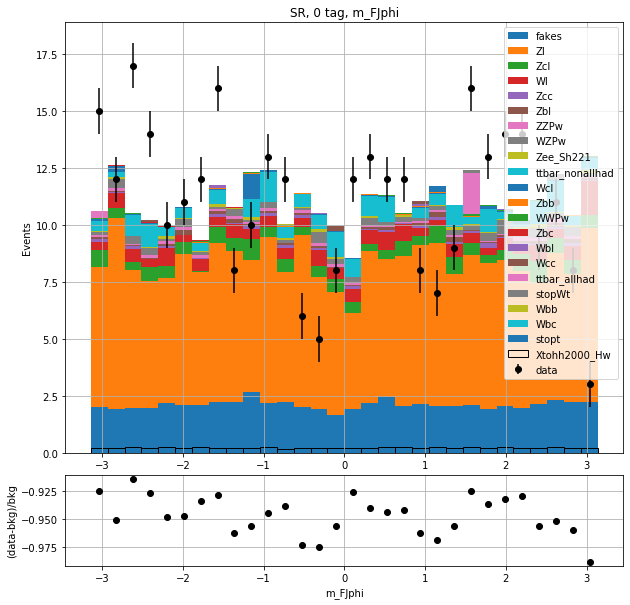

::: SR 0 m_FJm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [95 52 40 35 24 23 15 14 14  6  6  3  2  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [1.92272898e+03 1.01877674e+03 7.51826502e+02 5.78222605e+02
 4.70926674e+02 4.12488712e+02 3.03095700e+02 2.32873652e+02
 1.91254231e+02 1.42349573e+02 9.19975755e+01 5.20189664e+01
 4.29431888e+01 2.06226327e+01 1.38030157e+01 9.90886664e+00
 5.15928030e+00 4.16502762e+00 2.05531120e+00 9.66953993e-01
 7.59143829e-01 7.16756821e-01 1.50743484e-01 6.52923584e-02
 2.58880615e-01 1.91238403e-01 0.00000000e+00 0.00000000e+00
 

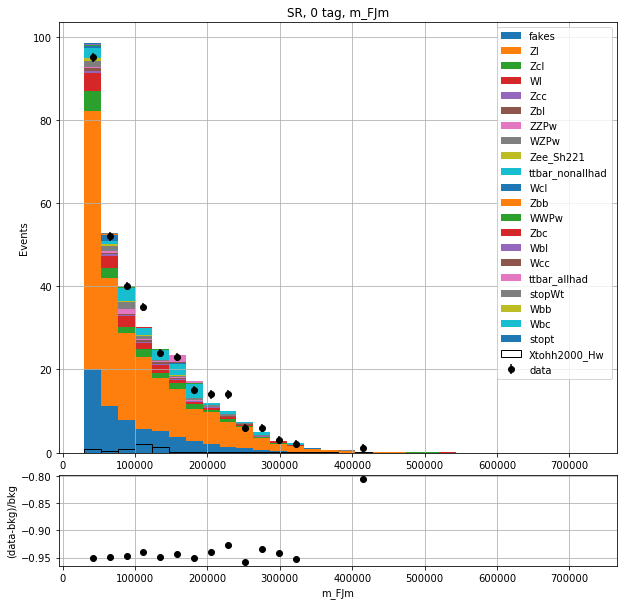

::: SR 0 m_DTpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [79 62 66 53 30 17  9  5  6  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.39856436e+03  1.27426345e+03  1.19564116e+03  1.02671782e+03
  6.01425999e+02  3.43639783e+02  1.72488448e+02  1.14909131e+02
  5.37332392e+01  3.83331865e+01  1.87988029e+01  1.14655519e+01
  7.40607643e+00  5.19639945e+00  3.02166629e+00  1.65971869e+00
  8.00258636e-01  6.79218292e-01  1.34275675e-01  5.75038910e-01
  3.44436646e-01  3.16509247e-01  1.64142609e-01  0.00000000e+00
 -1.92260742e-03 -1.28173828e-03  0.0

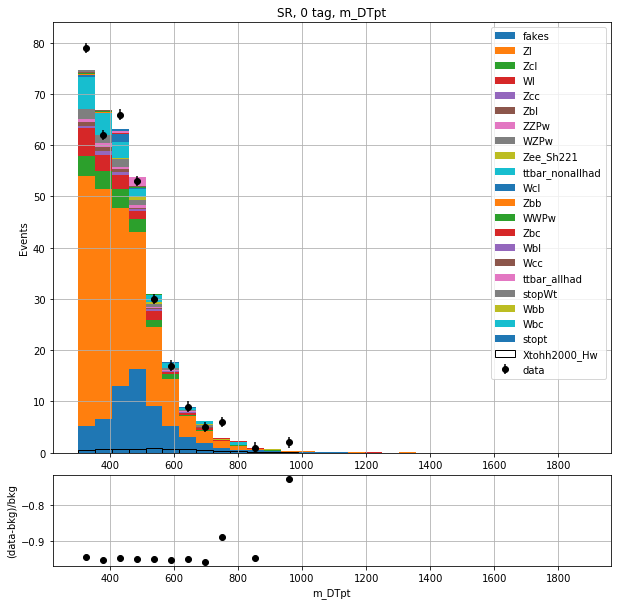

::: SR 0 m_DTeta
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [ 4  5  7  3  1 12  9  9 13  7 16 12 23 21 16 19 19  9 16 13 16 13 22 12
 13  3  3  7  4  3]
BACK [ 82.1593702   83.27318992 116.36933228  97.89811088  40.69829398
 180.34602664 228.39403972 237.49543195 254.01276883 271.26332571
 289.7406967  280.94836497 325.91959083 302.10805395 315.63548362
 323.67952266 314.98590171 301.91269678 298.62624818 341.65017784
 269.17373404 275.02578247 237.2234154  224.69712567 188.07445723
  44.72653604  80.37634128 121.43115956  84.30725163  58.18960834]
DIFF [-0.95131414 -0.93995667

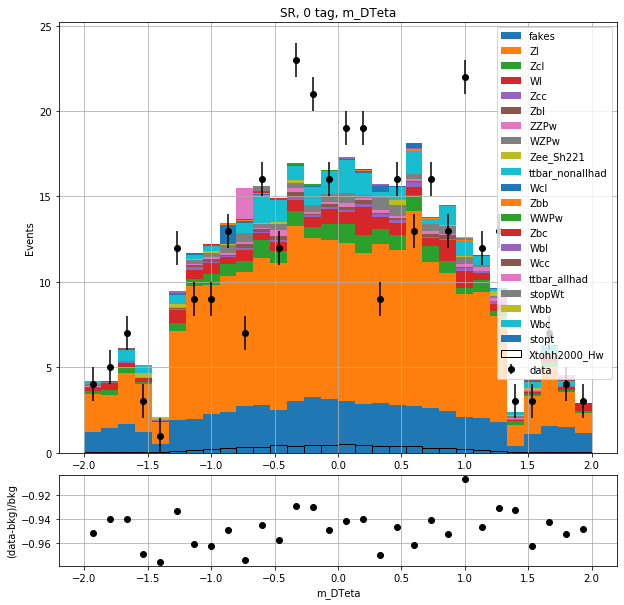

::: SR 0 m_DTphi
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [ 7 12 12 14  8  9  7 16 17  8 16  7  9  8  8 16 11 11 12 15 16 11 13  5
 10 13 12  7  6 14]
BACK [183.46193795 214.25192996 203.74477804 208.82078315 209.69490813
 222.50297011 225.26081499 209.96372861 198.39574942 200.46676059
 206.11131862 195.7232755  231.94420096 231.97326544 210.58354549
 232.56792918 218.58646084 196.98427332 206.51082656 192.76504099
 195.88685578 204.01049587 230.39215142 198.3001838  209.25646228
 231.27305394 211.20697141 214.17032117 196.65619659 178.87152171]
DIFF [-0.96184495 -0.94399117

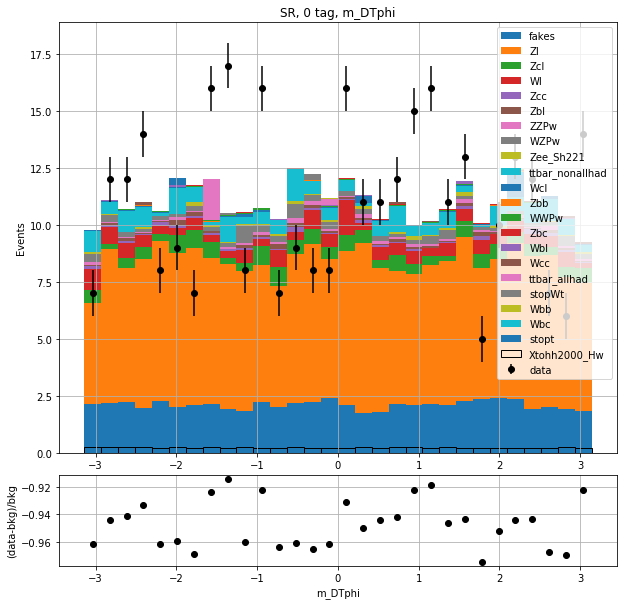

::: SR 0 m_DTm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [  6  33  99 103  37  15   8  10   6   5   2   1   3   1   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 9.13717133e+01  8.46391603e+02  1.84837858e+03  1.79263122e+03
  7.64542167e+02  3.01141036e+02  2.16263550e+02  1.40385991e+02
  9.63949512e+01  6.33587391e+01  4.28474745e+01  2.18936924e+01
  2.00940170e+01  9.72463441e+00  3.37426043e+00  4.30427545e+00
  2.94549298e+00  8.69476318e-01  1.29550552e+00  2.80319214e-01
  7.11170197e-01  5.66207886e-01 -7.04956055e-03  1.51630402e-01
  1.6205

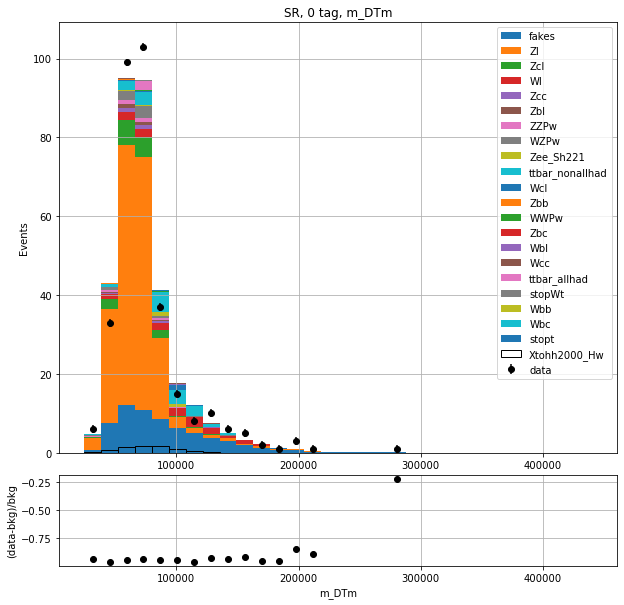

::: SR 0 m_dPhiFTwDT
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   1   2   2   5   6   7   9  18  27  60 192]
BACK [4.71260158e-01 5.22928126e-02 0.00000000e+00 5.40114039e-01
 1.63584372e-01 0.00000000e+00 1.51231237e-01 2.01740935e-01
 2.55865477e-01 1.23060445e-01 3.69200223e-01 6.97741704e-02
 4.59293614e-01 6.27129674e-01 1.39034217e+00 2.55688117e+00
 2.61236946e+00 4.35199820e+00 9.71599981e+00 1.50794640e+01
 2.80815886e+01 4.11345528e+01 5.68327735e+01 7.55197304e+01
 1.36699836e+02 1.94578006

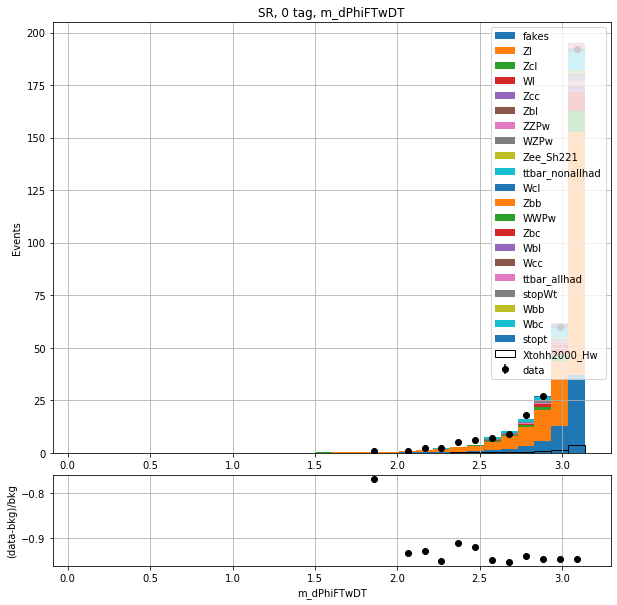

::: SR 0 m_dRFJwDT
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [ 0  0  0  0  0  0  0  1  0  1  6  6  5 12 25 85 86 49 28 13  5  1  3  1
  1  0  0  2  0  0]
BACK [3.36102397e-01 3.53108848e-01 2.65227404e-01 6.96513635e-01
 1.67214141e+00 1.27396486e+00 3.42042251e+00 7.02741859e+00
 1.10879355e+01 2.70006254e+01 4.98672962e+01 7.13114530e+01
 1.29263908e+02 2.49103221e+02 4.76032095e+02 1.51072804e+03
 1.87805722e+03 7.59587016e+02 3.98582759e+02 2.58391647e+02
 1.58228048e+02 1.09021783e+02 6.87207998e+01 4.52025858e+01
 2.45507143e+01 1.38228745e+01 6.22755861e+00 2.81046677e+

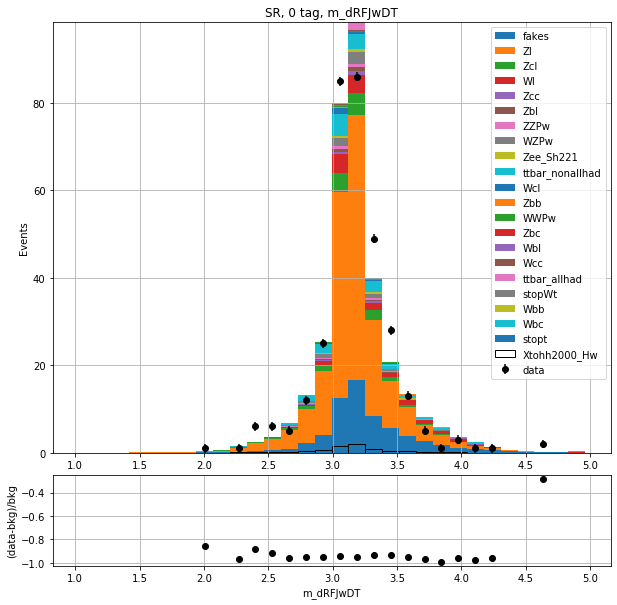

::: SR 0 m_dPhiDTwMET
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [ 3  0  1  6  8  6  3  5  2  6 10 11 17 33 45 33 44 30 23  9  5  4  5  4
  4  3  2  3  2  3]
BACK [ 35.21162302  38.17557216  44.69774636  52.9483868   69.41887749
  57.00330485  77.4905592  111.93733072 127.33183083 150.33587617
 214.92331767 285.81071873 389.12316249 617.93306691 796.80581091
 797.68262589 653.59202856 429.72637221 311.41296934 228.74943662
 170.77690977 128.33953756  91.80365512  84.17236401  55.44124514
  62.86197621  67.85678756  46.29478538  34.39839733  38.08737028]
DIFF [-0.91480086 -1.   

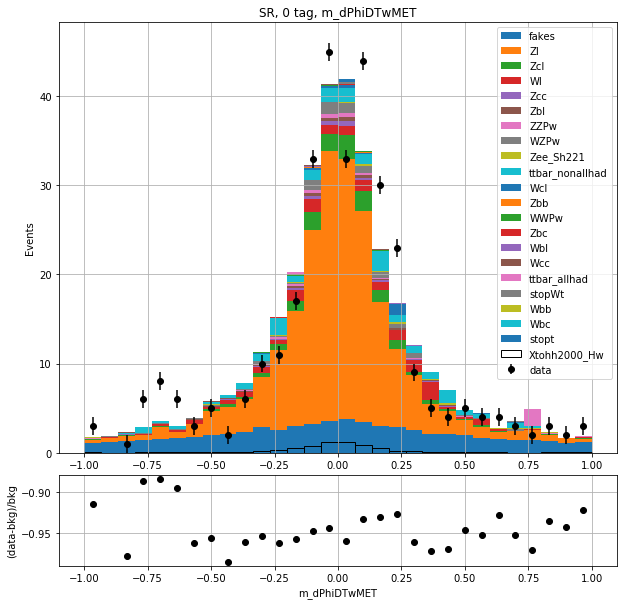

::: SR 0 m_MET
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [87 77 69 30 29 12 16  6  2  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.74460387e+03  1.38154516e+03  1.14372778e+03  7.50219304e+02
  5.61386598e+02  2.86600422e+02  1.54013578e+02  1.13773974e+02
  6.03332087e+01  2.70428257e+01  1.84788821e+01  9.81999272e+00
  6.87050772e+00  6.34335136e+00  2.30897754e+00  8.60347748e-01
  5.69958448e-01  3.80347580e-01  5.65993071e-01  9.17739868e-02
  1.31469727e-01  3.07685852e-01  2.19154358e-01  0.00000000e+00
  6.09626770e-02 -1.28173828e-03  0.00

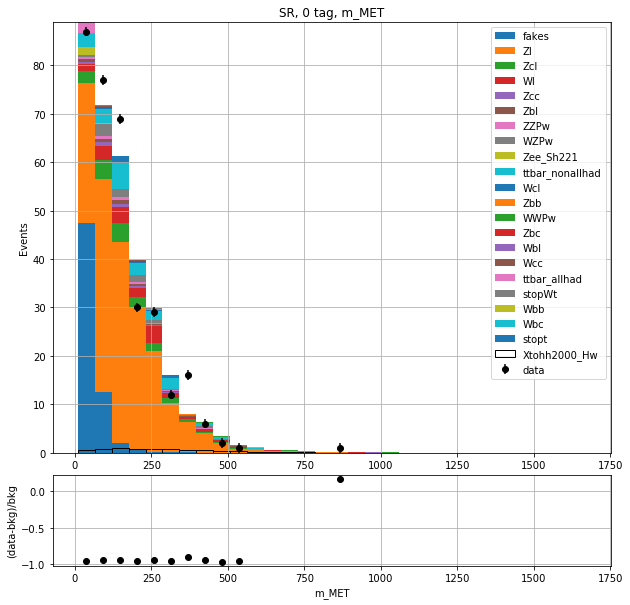

::: SR 0 m_hhm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [  0   9  98 109  60  22  14   9   1   2   1   1   0   2   1   0   1   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 7.50309918e-01  1.27811177e+02  1.88138937e+03  1.93570603e+03
  1.03972688e+03  5.79441541e+02  3.22579848e+02  1.76178767e+02
  8.32158713e+01  4.88206623e+01  3.22591754e+01  1.55714061e+01
  9.93354762e+00  4.66466564e+00  4.36569595e+00  2.03433609e+00
  3.45289993e+00  6.91806793e-01  4.56596375e-01  3.91090393e-01
  3.28285217e-01  4.55017090e-01  8.27026367e-02  0.00000000e+00
  0.0000

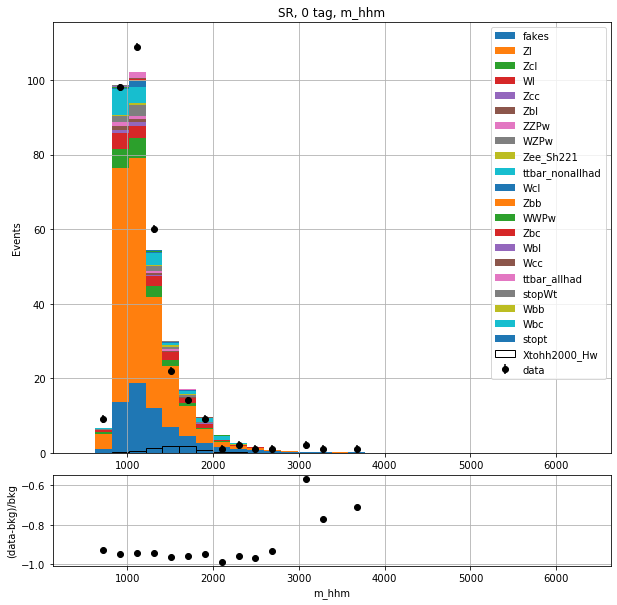

::: SR 0 m_bbttpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
ttbar_allhad 2 2.1130304
stopWt 2 0.36315823
Wbb 2 0.037918046
Wbc 2 0.016911913
stopt 1 0.29318509
DATA [30 67 68 67 35 18 20 10  6  3  3  1  0  0  0  0  1  1  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [6.26114257e+02 1.15211869e+03 1.35658380e+03 1.17438350e+03
 7.38544732e+02 4.28854601e+02 2.99655143e+02 2.10142023e+02
 1.01270334e+02 5.52944479e+01 4.12618015e+01 3.31644971e+01
 1.59751842e+01 1.21330693e+01 6.82330638e+00 5.33083153e+00
 3.94400141e+00 2.51959455e+00 1.63921285e+00 8.85906219e-01
 1.02278519e+00 1.05735397e+00 4.71595764e-01 2.21317291e-01
 2.51274109e-01 6.96487427e-02 1.99584961e-01 2.18200684e-0

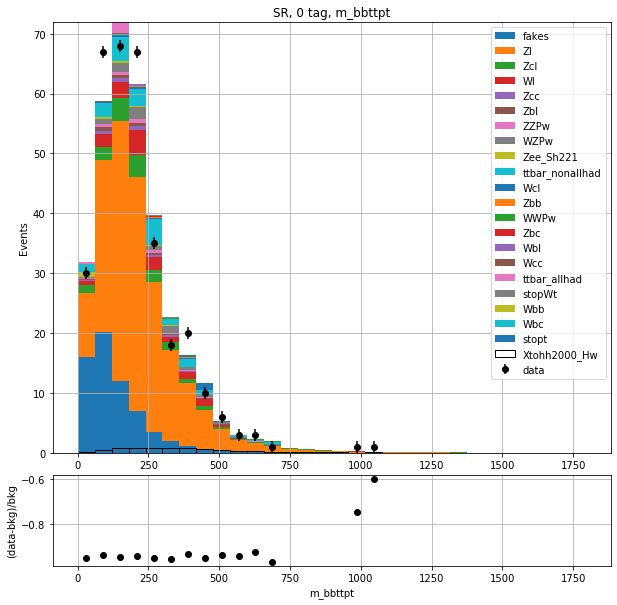

-->df.shape (19476, 19)
::: SR 1 m_FJpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 2 1 8 6 1 1 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.16849867e+00  6.59517890e+00  5.42930038e+01  1.23817945e+02
  1.12173716e+02  8.49233120e+01  3.76714942e+01  3.82039918e+01
  2.24095886e+01  1.26226893e+01  1.11670651e+01  7.53648949e+00
  2.63583952e+00  3.01652956e+00  1.22013044e+00  1.11471200e+00
  3.11989069e-01  1.95278168e-01  2.44357109e-01  3.80308151e-01
 -4.43458557e-03  1.55611038e-01  0.00000000e+00  1.50394440e-03
  1.31475449e-01  1.92843676e-01  0.00000000e+00  0.00000000e+00
 -

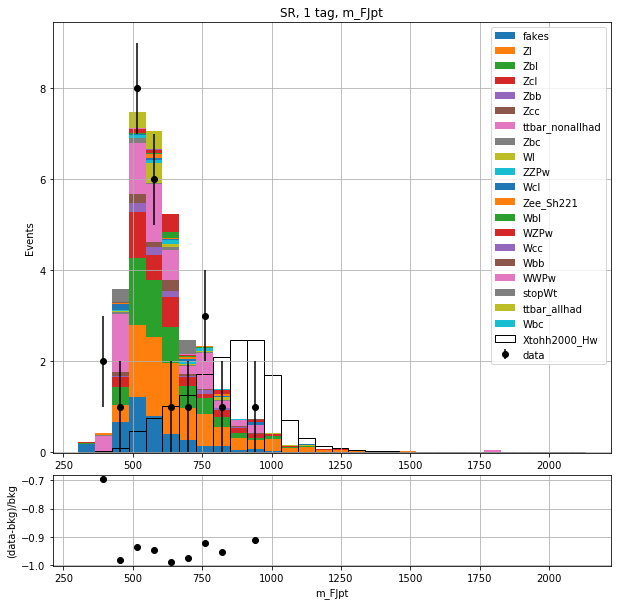

::: SR 1 m_FJeta
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 0 0 1 0 1 0 1 1 1 0 3 0 0 2 1 0 1 2 3 2 0 1 0 1 1 1 0]
BACK [ 1.46344756  3.99428172  8.44944023  2.02998826 15.1944982  10.86763119
 15.99361736 26.30621643 19.85100563 22.93295533 19.83715757 28.11039437
 24.21034862 33.93287633 37.08925831 29.46083764 28.65792584 11.13401346
 32.52219765 20.72089232 28.9782699  13.68494187 16.58321327 14.90301055
 20.49790204  7.68356588  9.20364324 12.01550609  3.06079483  5.88941953]
DIFF [-1.         -1.         -0.88164896 -1.         -1.         -0.90798363
 -1.         -0.96198617 -1.        

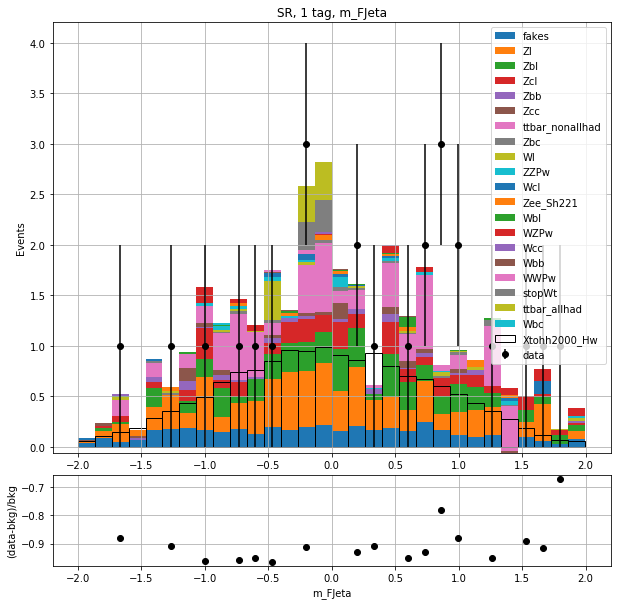

::: SR 1 m_FJphi
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 1 2 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 2 0 1 0 1 2 2 0 2 1 0 2]
BACK [17.18290931 16.13697589 15.93524117 19.38804564 18.25894986 18.05731597
 13.70277611 14.68780869 19.06753469 27.1090722  13.24241607 12.11687057
 19.24667051  7.79096982 14.52790403  3.28543131 21.56142238 20.25465941
 20.43836287 18.66082257 23.83598031 10.78311732 19.79595634 16.36585701
 22.2470928  22.61124761 15.88093281 30.61103617 17.49421507 14.98167315]
DIFF [-1.         -0.93803052 -0.87449202 -1.         -1.         -0.94462078
 -1.         -0.93191632 -1.        

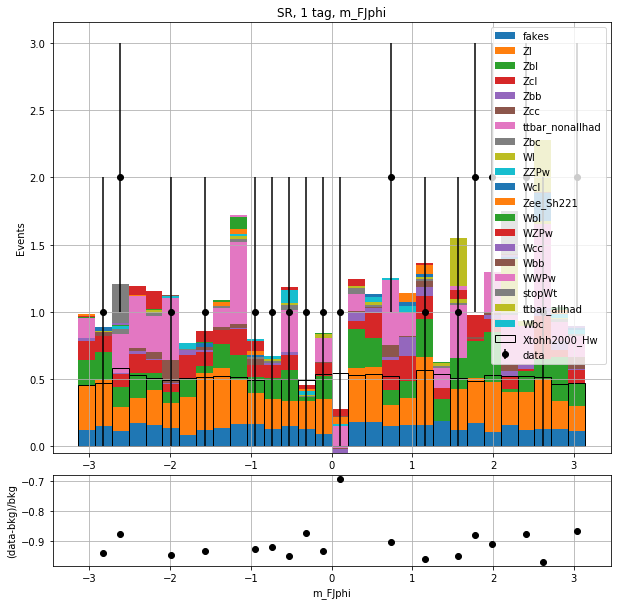

::: SR 1 m_FJm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [5 3 2 3 4 3 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.52386619e+02  7.89870853e+01  5.67833962e+01  6.15643045e+01
  7.72628173e+01  3.30044388e+01  3.10878938e+01  1.20802230e+01
  7.30771017e+00  5.26060009e+00  6.49215943e+00  2.06015038e+00
  7.95776367e-01  2.79595882e-01 -3.34242821e-01 -1.59263611e-03
 -3.62396240e-04  2.44308472e-01 -2.00271606e-04 -4.00543213e-04
 -2.76565552e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.67028809e-04 -2.47955322e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0000000

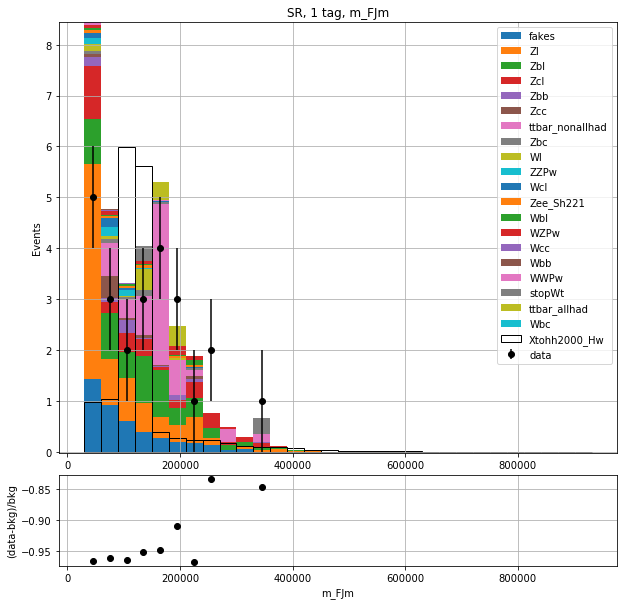

::: SR 1 m_DTpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [5 5 7 2 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.48865509e+01  9.07781241e+01  7.59435399e+01  6.84901432e+01
  6.76507344e+01  4.35311209e+01  2.27086145e+01  2.34306110e+01
  1.63345019e+01  1.05508782e+01  6.28645212e+00  5.93742919e+00
  3.58592764e+00  9.46170449e-01  2.45650589e+00  2.04152107e-01
  3.07011902e-01  3.28383446e-01  1.89990997e-01  2.77823329e-01
 -4.86373901e-04  1.24078751e-01  0.00000000e+00  1.56316757e-01
  0.00000000e+00  0.00000000e+00 -1.42097473e-03  0.00000000e+00
  0.00000000e+00  1.563167

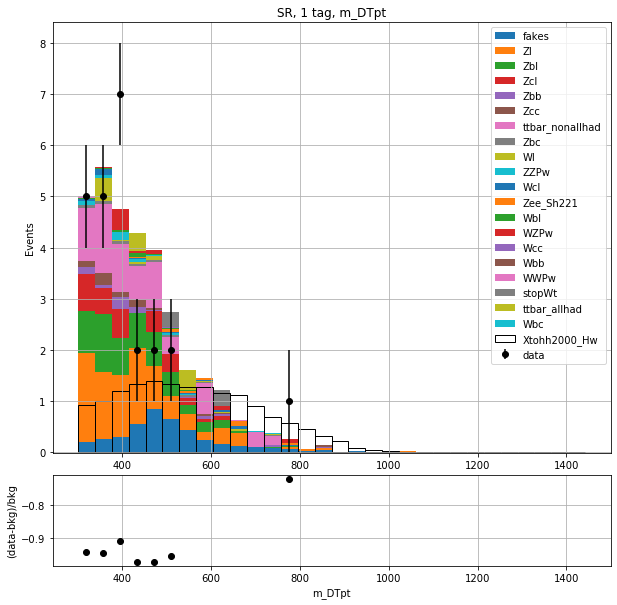

::: SR 1 m_DTeta
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 1 1 1 2 0 1 1 1 1 0 2 1 0 1 1 1 2 1 0 1 1 0 0 2 0 1 0]
BACK [ 7.64401582  5.1332902  15.29420705  5.67735758  3.34754174 10.62351022
 15.82527643 20.05619457 18.36207115 16.88587087 18.18820228 24.50903005
 25.98410683 26.42915376 32.03648653 44.89876418 22.99389446 25.1644603
 32.78607301 18.42260286 25.5656981  25.21920675 21.72674077 17.00181636
  8.43119718  5.07748495  6.68750039 14.14408827  6.80150175  4.34204531]
DIFF [-1.         -1.         -0.93461577 -0.82386172 -0.70127333 -0.90586915
 -0.8736199  -1.         -0.94553991 

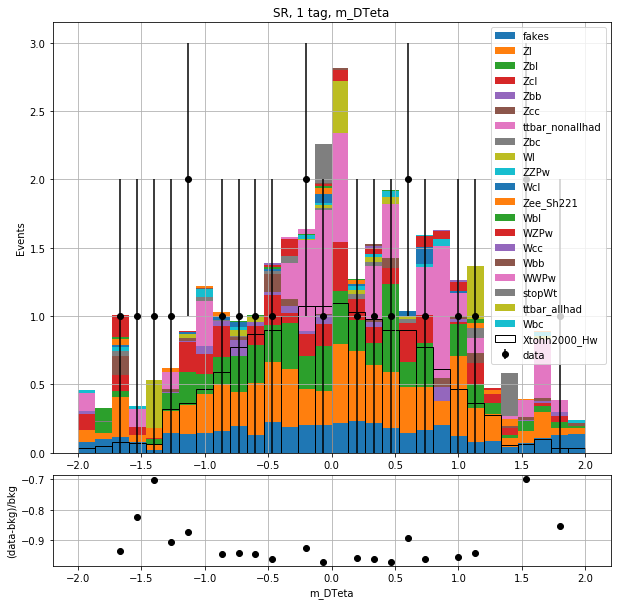

::: SR 1 m_DTphi
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [1 0 0 2 0 0 1 0 1 1 2 0 3 0 1 0 1 3 0 0 1 1 0 0 1 0 0 0 3 2]
BACK [ 5.65093586 19.7374404  15.98111437 23.46330858 16.65601345 18.010538
 15.09672485 24.10396747 18.99186217 17.20193271 22.3320972  19.70154311
 19.54460713 21.61259966 21.20632037 19.3101161  14.99497522 12.59569794
 19.22039472 16.91136934 16.09549654 18.01872262 11.13319151 23.72256254
 23.18739963 14.9462396  14.26739441 14.71633913  7.845597   19.00289039]
DIFF [-0.82303816 -1.         -1.         -0.91476053 -1.         -1.
 -0.93376047 -1.         -0.94734587 -0.941867

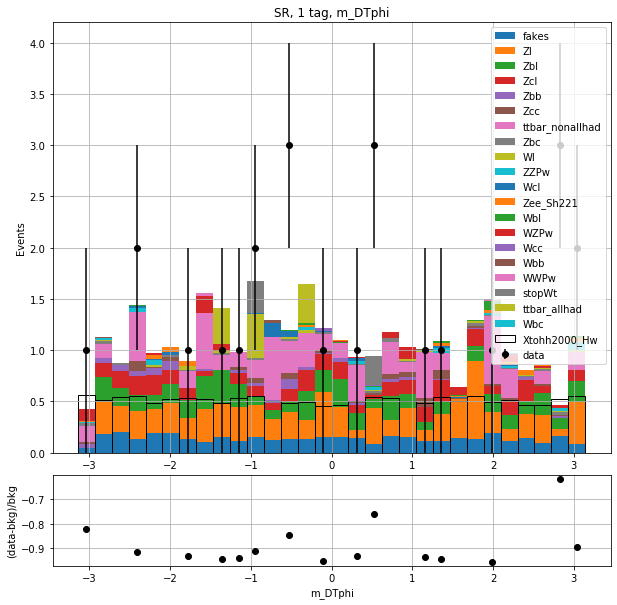

::: SR 1 m_DTm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 1 2 8 6 2 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 5.18166538e+00  2.98995370e+01  7.30578481e+01  1.01649759e+02
  1.23496395e+02  8.35266981e+01  2.78901774e+01  1.37335498e+01
  1.90137464e+01  1.73085476e+01  6.91836357e+00  8.28624493e+00
  5.03383249e+00  2.81101435e+00  2.58127517e+00  6.81621075e-01
  1.02837563e+00  1.33808295e+00  1.42784119e-01  2.88415053e-01
  3.12690437e-01  1.55989647e-01  2.87157595e-01  1.50461197e-01
  1.56316757e-01  5.79071045e-03  0.00000000e+00 -7.32421875e-03
  1.56316757e-01  1.7411327

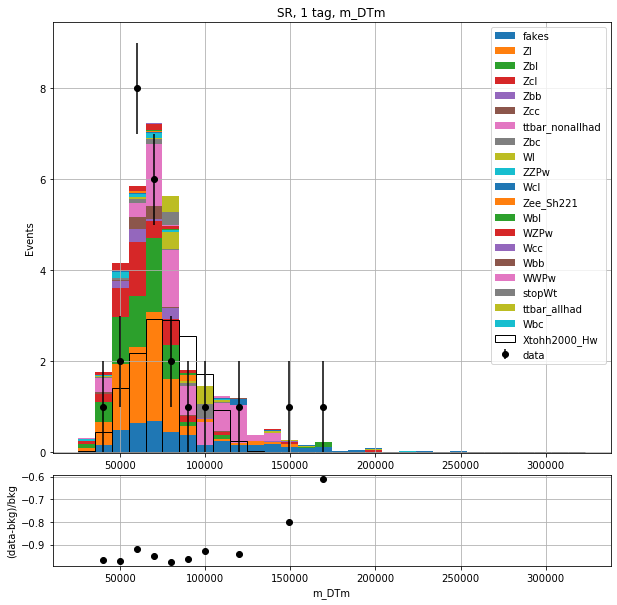

::: SR 1 m_dPhiFTwDT
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 3 3 3 3 9]
BACK [-2.45449762e-02  0.00000000e+00 -8.56814440e-04 -9.43490304e-04
 -2.89345253e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.72172800e-01  3.19215171e-01  6.42815977e-02
  1.82010200e-01  5.58200199e-02  3.43462940e-01  8.57360552e-01
  1.08125601e+00  1.16522691e+00  1.27130744e+00  1.95054110e+00
  2.08490430e+00  3.21658332e+00  5.00082248e+00  1.08318569e+01
  1.68398405e+01  1.75454105e+01  2.83226491e+01  5.21882962e+01
  1.09712835e+02  2.7

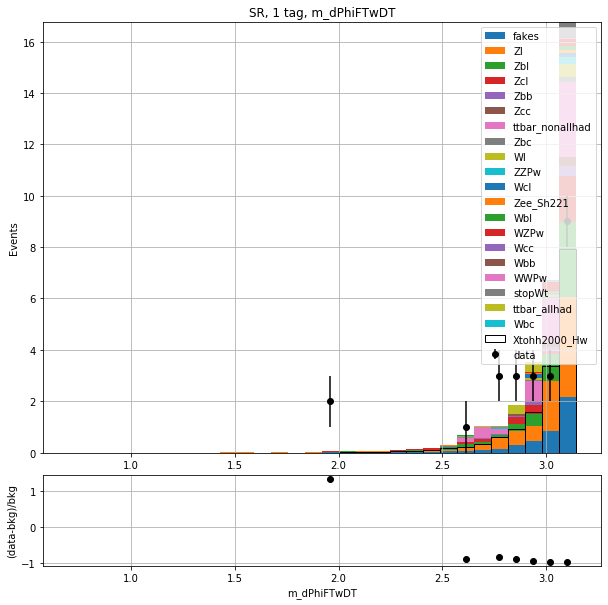

::: SR 1 m_dRFJwDT
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 2 0 0 0 0 0 0 1 5 7 5 1 1 0 0 0 0 1 1 0 0 0 0 0]
BACK [-5.44229941e-02  0.00000000e+00  0.00000000e+00  4.13672935e-01
 -1.37283327e-02 -2.34053005e-02  3.13490021e-01  7.57025686e-01
  1.36278192e+00  1.84147531e+00  2.33069465e+00  5.75488112e+00
  1.29480664e+01  1.93466075e+01  4.29492915e+01  1.40608268e+02
  1.45859365e+02  5.44133872e+01  3.34115033e+01  2.07379474e+01
  1.72306205e+01  1.13034481e+01  3.17800123e+00  5.40083718e+00
  1.67800200e+00  1.81878793e+00  1.05073166e+00  3.21483612e-01
  1.91850662e-01  1.286

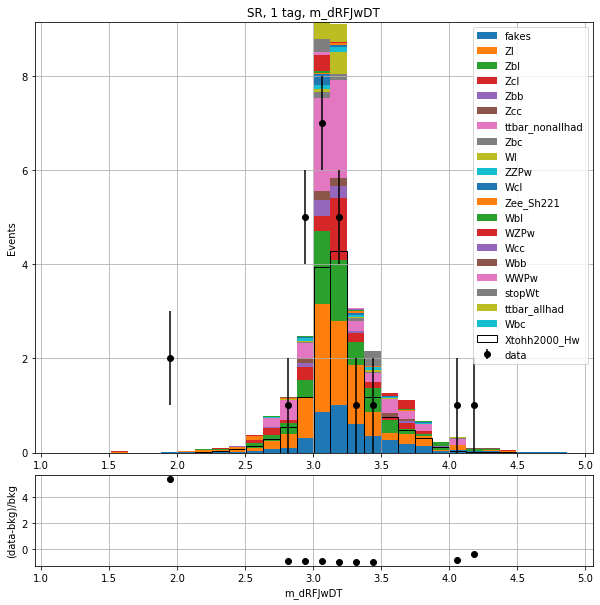

::: SR 1 m_dPhiDTwMET
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 0 1 0 2 0 1 2 2 2 3 0 4 2 0 1 0 1 1 0 1 1 0 0 0]
BACK [ 3.09781823  1.51410098  4.759386   10.68757402  4.34615677  4.32491061
  5.74577383  6.91292176  6.95281485 13.87652771 21.64552587 26.04199875
 43.37068293 58.94315352 66.65893527 70.18865821 42.24209225 28.265755
 29.55344611 17.64225852 21.88592795 12.54696173  7.70750916 -5.41042221
  3.08665602  3.97078997  1.36533406  5.626663    4.1767807   3.53275332]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.85534336 -1.         -0.8

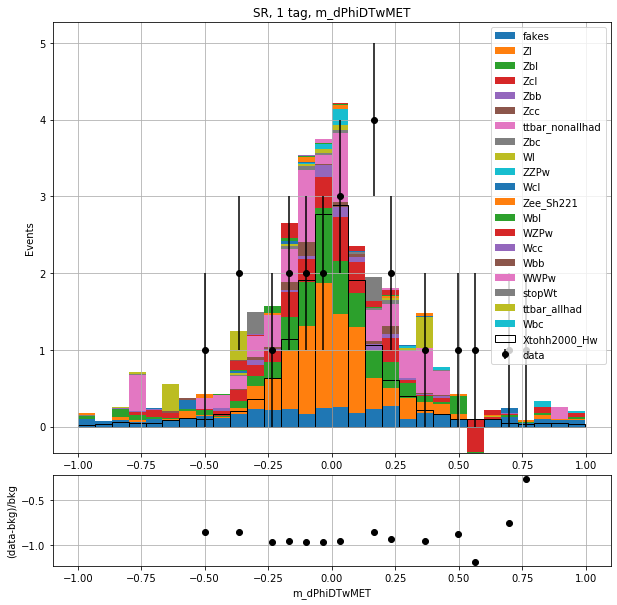

::: SR 1 m_MET
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [2 5 4 3 5 0 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 9.88256019e+01  1.14915733e+02  7.85962298e+01  7.66856250e+01
  4.95124559e+01  3.09148673e+01  1.71176657e+01  1.75149152e+01
  1.11005882e+01  1.76199902e+01  4.33954484e+00  3.64058727e+00
  1.01679635e+00  7.64539242e-01  4.87096786e-01  3.58349085e-01
  1.72409058e-01  1.14356327e+00 -1.31806374e-01  2.62769699e-01
  1.58620834e-01  1.12694025e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.35957718e-01  0.00000000e+00 -2.33650208e-03
  0.00000000e+00 -3.1375885

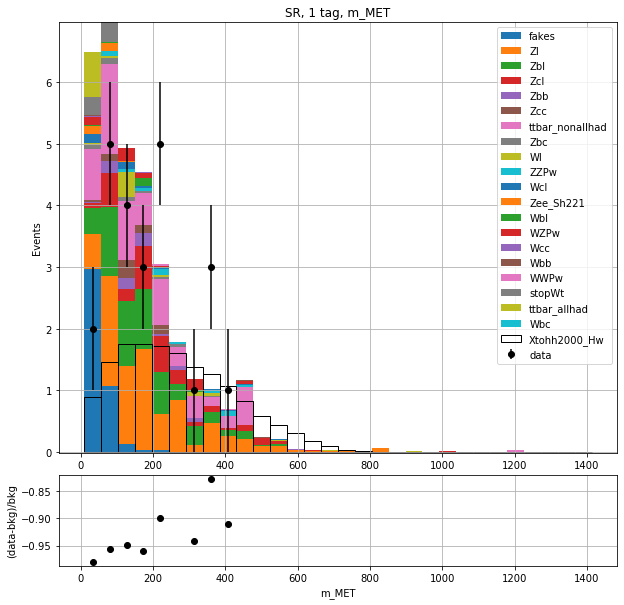

::: SR 1 m_hhm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 6 7 5 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-9.43490522e-04  2.39212110e-01  7.52202915e-02  7.26421269e+01
  1.33941933e+02  1.10588100e+02  7.18646134e+01  4.14912173e+01
  2.51153974e+01  1.86238002e+01  1.72326114e+01  1.08047728e+01
  5.09784678e+00  6.50900925e+00  2.76344436e+00  1.63313675e+00
  3.25787565e+00  1.71189737e+00 -5.98978996e-02  6.28585815e-01
  1.28021240e-01  3.19213867e-01  1.56059265e-01  2.57301331e-01
 -3.57103348e-01  1.59961700e-01  0.00000000e+00 -5.19752502e-03
  0.00000000e+00  4.4128418

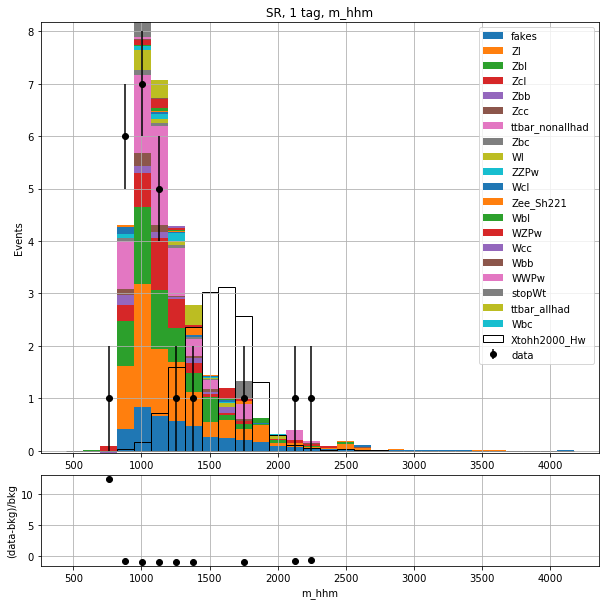

::: SR 1 m_bbttpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 3 5 7 4 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.49426248e+01  9.82208883e+01  1.18326819e+02  8.86014831e+01
  6.43937540e+01  4.00808319e+01  2.38699304e+01  1.81506609e+01
  1.25177805e+01  5.31911230e+00  4.02102980e+00  2.67358160e+00
  1.19683933e+00  1.20886040e+00  2.49632835e-01  6.52573824e-01
  1.56312943e-01  1.84484482e-01  3.13282967e-01 -6.67572021e-05
 -9.34600830e-04 -3.12709808e-02  1.25398636e-01 -1.44958496e-03
  0.00000000e+00  2.95352936e-03  0.00000000e+00  8.27493668e-02
  0.00000000e+00  1.3172

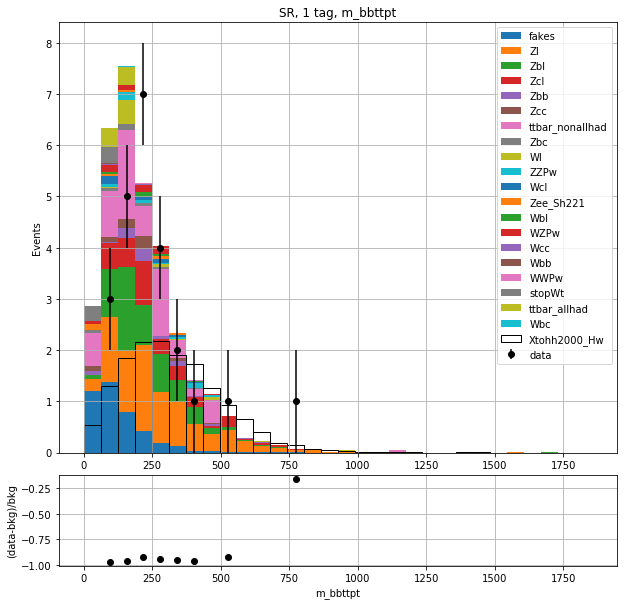

-->df.shape (11192, 19)
::: SR 2 m_FJpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-3.33174501e-04  1.49391351e-01  1.37374784e+00  3.06879695e+00
  5.26896768e+00  3.91382097e+00  1.92001959e+00  1.46813207e+00
  6.28386736e-01  1.24822579e-01  3.36459450e-01  3.06121565e-01
  2.31950089e-01  1.13670419e-01  2.49212980e-02  1.80389717e-01
 -7.19577074e-03 -3.51199508e-03 -1.15165114e-03  4.55852449e-02
 -3.47167253e-04 -8.85128975e-05 -2.68161297e-04 -2.14725733e-04
 -1.17361546e-04 -8.58902931e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.26173210e-05]
DIFF [-1.       -1.       -1.       -1.       -0.620419 -1.       -1.
 -1.       -1.       -1.       -1.       -1.       -1.       -1.
 -1.       -

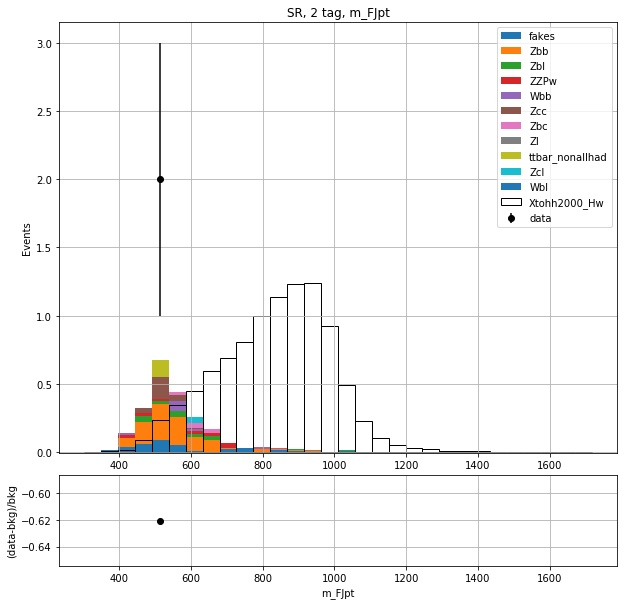

::: SR 2 m_FJeta
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
BACK [ 0.05257561  0.15293952  1.09180582  0.25260368  0.0963447   0.41218352
 -0.21044437  0.24883968  1.67207566  2.65198355  0.56193918  0.52750343
  0.79602575  0.72848372  1.48376865  0.2898441   1.52923996  0.66490994
  0.23473791  1.31563473  0.85314821  0.71879246  0.62426409  0.61418176
  0.34366125  0.43111238  0.75120541  0.03018913  0.15843925  0.06384254]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.89572226
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          0.17212929 -1.         -1.         -1.
 -1.         -1.    

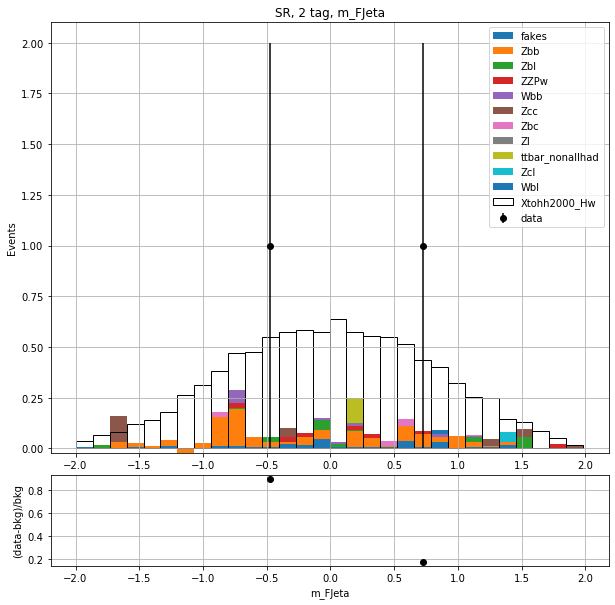

::: SR 2 m_FJphi
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.24452408 0.03653394 1.23172352 0.41495919 0.3825284  0.23701858
 0.31457066 0.38884875 1.5693991  0.71255689 0.48190358 0.90832424
 0.53100528 0.5335184  0.52527487 0.19195218 1.07175964 0.97538048
 0.2333913  0.42804813 0.55075173 0.78676745 1.23857129 0.63073117
 0.52889391 2.65824367 0.92113202 0.14555675 0.24273911 0.02522388]
DIFF [ 3.08957677 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.          4.20963075 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.      

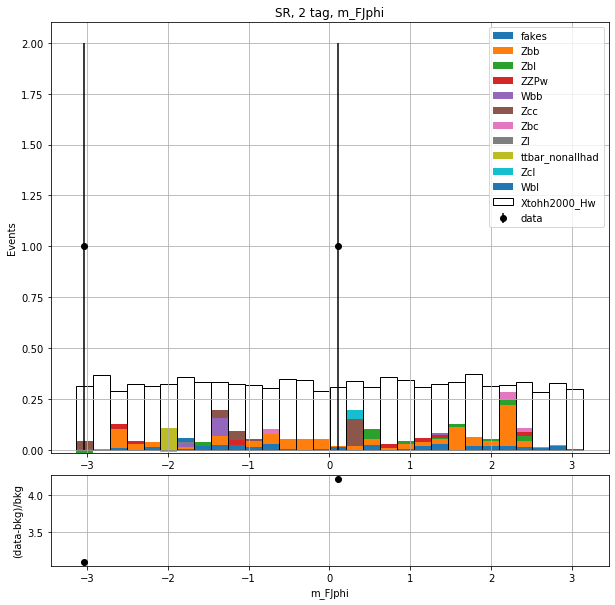

::: SR 2 m_FJm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.33286350e+00  4.22739135e+00  3.06030366e+00  2.28149670e+00
  1.58954002e+00  2.61391363e+00  1.01442027e+00  9.29821640e-01
  3.17733556e-01  1.65230580e-01  4.79778152e-01  4.10226222e-01
  4.19526696e-02  1.21943593e-01  2.47942597e-01  9.42155719e-02
  5.41876256e-02  7.40970597e-02  8.55650902e-02 -1.05887651e-04
 -2.37345695e-04 -1.06543303e-04 -1.52766705e-04  0.00000000e+00
 -1.27524137e-04  0.00000000e+00  0.00000000e+00 -6.09755516e-05
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.34647008 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

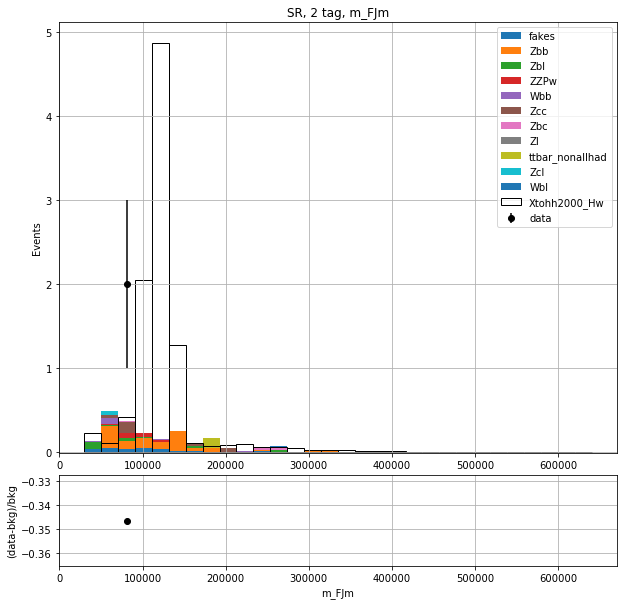

::: SR 2 m_DTpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.50364755e+00  2.08454132e+00  1.71944964e+00  2.76153261e+00
  1.49953450e+00  2.60622755e+00  1.02213588e+00  1.80778725e+00
  6.64508507e-01  6.27175421e-02  6.58415422e-01  1.55530930e-01
  3.61452036e-01 -1.42656565e-02 -1.18459761e-02  7.39433467e-02
  7.75969625e-02 -5.33929467e-03  1.22414827e-01 -3.11827660e-03
 -9.95606184e-04 -1.49849057e-03 -1.37358904e-04 -1.61716342e-03
 -1.48177147e-04 -4.85181808e-04  0.00000000e+00  0.00000000e+00
 -1.55061483e-04  0.00000000e+00]
DIFF [-1.         -1.         -1.         -0.63788224 -0.33312638 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.        

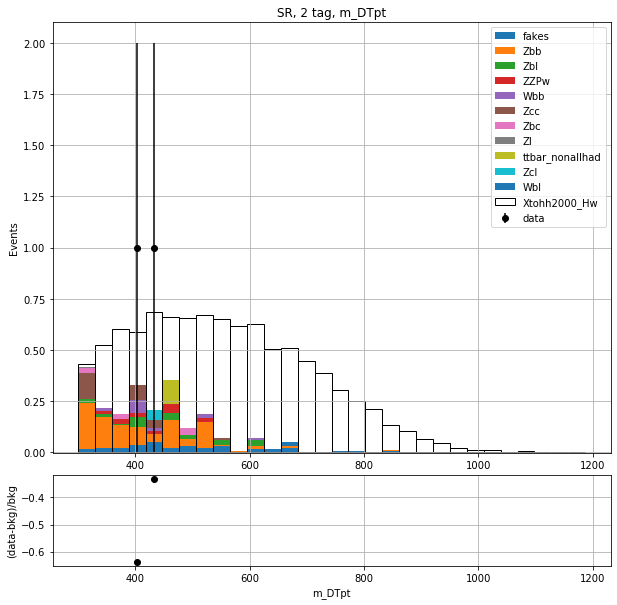

::: SR 2 m_DTeta
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
BACK [0.0531913  0.05401359 0.55827418 0.05185618 0.24721952 1.29126965
 0.53284931 0.17605651 0.84287166 1.93465429 0.38330526 0.20285024
 0.32295394 0.18179848 1.7548511  1.62254364 0.89676271 0.01334454
 0.18346107 1.37860284 2.11029264 0.83716457 0.54009789 0.51983413
 0.53125456 0.23644936 0.25920284 0.35126916 0.65781158 0.41572508]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.          0.19450827 -1.         -1.
  0.88233678 -1.         -1.         -1.         -1.      

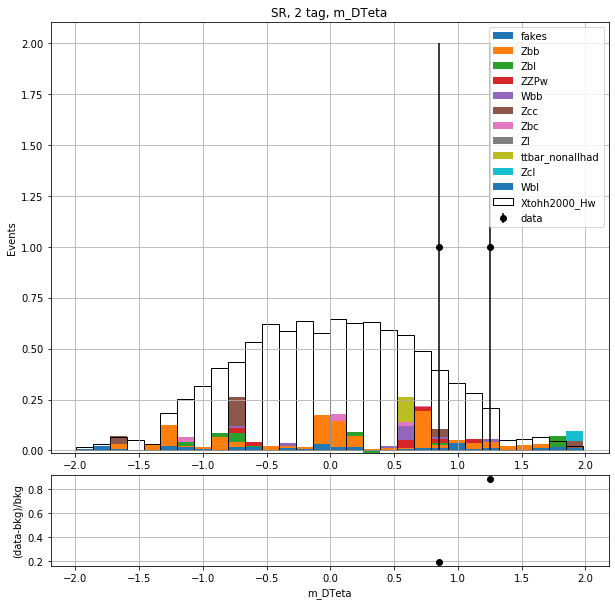

::: SR 2 m_DTphi
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [1.12459817 0.45885774 0.68783147 0.17305718 0.78805558 1.73060123
 0.59483177 0.14324798 0.66505207 2.02608248 1.13418482 0.44139588
 0.53775983 0.1539095  0.2788053  0.07699767 0.26613283 0.93157616
 0.41684704 0.27790511 0.5285882  0.2166279  0.49511394 0.84764724
 1.12558593 0.88124061 0.82081085 0.40195444 0.62433752 0.29219213]
DIFF [-0.1107935 -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        11.9874064 -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.       ]


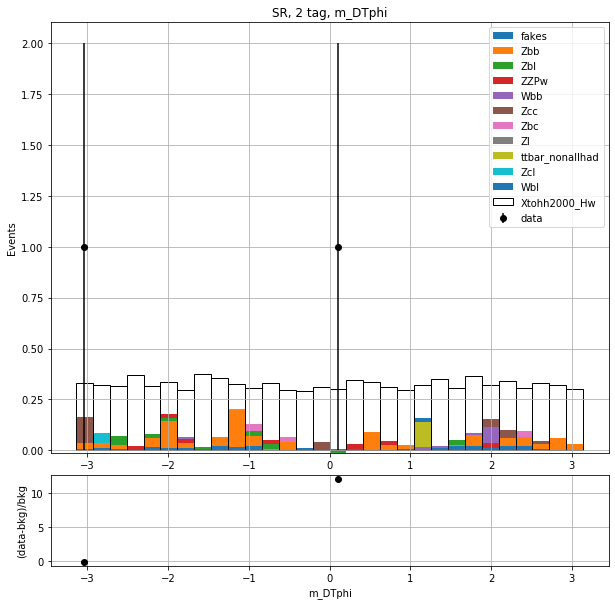

::: SR 2 m_DTm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-4.33053425e-04  3.08838923e-01  6.84553959e-01  1.21520837e+00
  3.47881036e+00  3.05980830e+00  2.70883867e+00  2.24066877e+00
  1.45704584e+00  5.29067367e-01  1.46617278e-01  5.45985013e-01
  1.80622751e+00  2.23305911e-01  1.52621619e-01  5.63564897e-03
  1.05553925e-01  1.56621933e-01  3.53550017e-02  2.22920179e-01
 -3.90112400e-04 -8.42511654e-05  6.26970828e-02  0.00000000e+00
 -9.31352377e-04 -2.62260437e-06  0.00000000e+00 -1.13132596e-03
 -1.30474567e-04 -1.44702196e-03]
DIFF [-1.         -1.         -1.          0.64580828 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

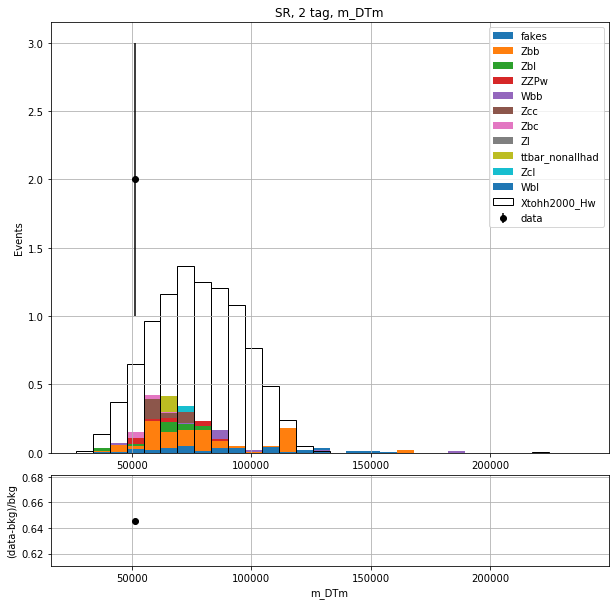

::: SR 2 m_dPhiFTwDT
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
BACK [-9.73921897e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.34012428e-04 -5.36437765e-05
 -8.38419197e-04 -9.79596516e-05  4.10070999e-02 -2.90185635e-04
 -1.65551101e-04 -2.60463671e-03 -1.11263574e-03  3.30625842e-02
  1.33669396e-01  8.63875523e-02  1.51807779e-01  1.69669140e-01
  1.63501971e+00  3.84404086e-01  1.31455862e+00  1.45942204e+00
  4.45496987e+00  9.28325031e+00]
DIFF [-1.                 nan         nan         nan         nan         nan
         nan         nan         nan         nan -1.         -1.
 -1.         -1.       

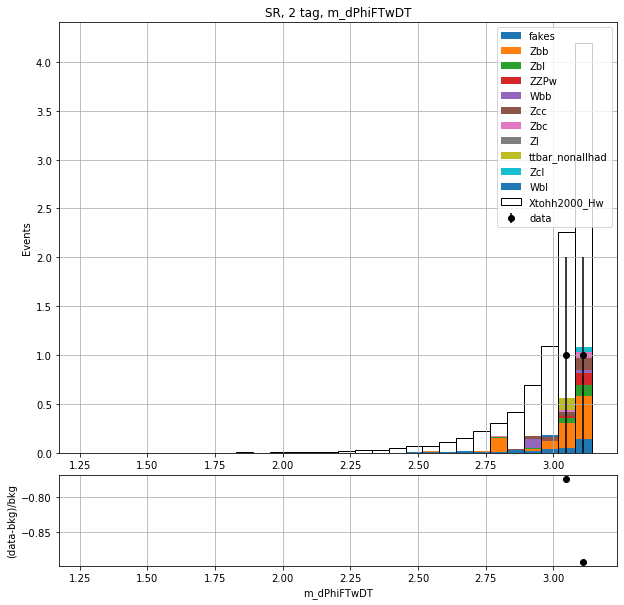

::: SR 2 m_dRFJwDT
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.00000000e+00  4.12096550e-02 -1.43617382e-04 -5.36424159e-04
 -5.95848862e-04  6.17534075e-02  6.60467311e-02  1.94330368e-01
  3.33957777e-01  1.72503007e+00  5.01081284e-01  3.79545445e+00
  4.52944205e+00  2.95971027e+00  1.12813526e+00  2.13497493e+00
  2.85681233e-01  7.06745654e-01  1.85298800e-01 -2.92944908e-03
  2.05615163e-01  1.18170612e-01  1.20393932e-01 -1.98662281e-04
 -1.38342381e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.33404946e-02]
DIFF [        nan -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.73652694
 -1.         -1.         

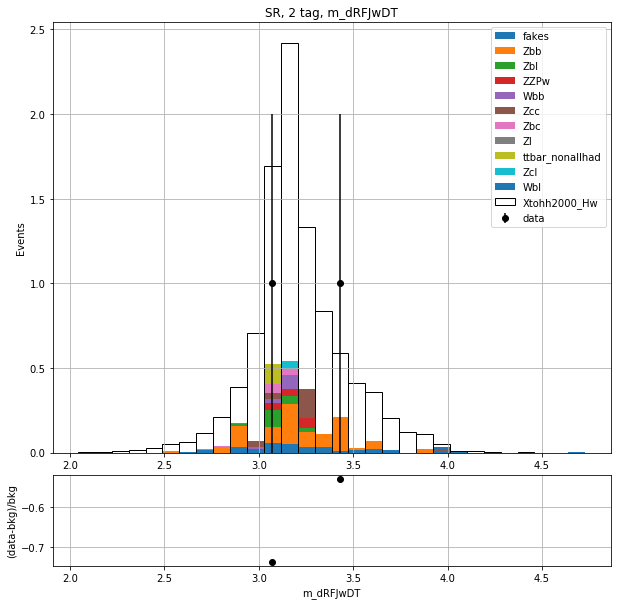

::: SR 2 m_dPhiDTwMET
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.27893247e-02  1.46326956e-01  2.64133800e-01  1.05308015e-01
  8.05477252e-01 -2.96481326e-03  5.05246975e-01  5.03393747e-02
 -1.91355050e-02  1.68267418e-01  1.54174593e+00  1.09239017e+00
  4.19910252e-03  1.55018663e+00  5.21202329e+00  1.22189091e+00
  1.48299138e+00  1.22213013e+00  9.13258612e-01  4.36260745e-01
  2.58768484e-01  5.96013650e-01  1.59923300e-01  4.43484843e-01
  1.46590352e-01  1.37728035e-01  2.07747638e-01  3.48859370e-01
 -2.52533853e-02  8.51034522e-02]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         18.86516531 -1.         -1.         -1.         -1.
 -1.         -1.         -1.  

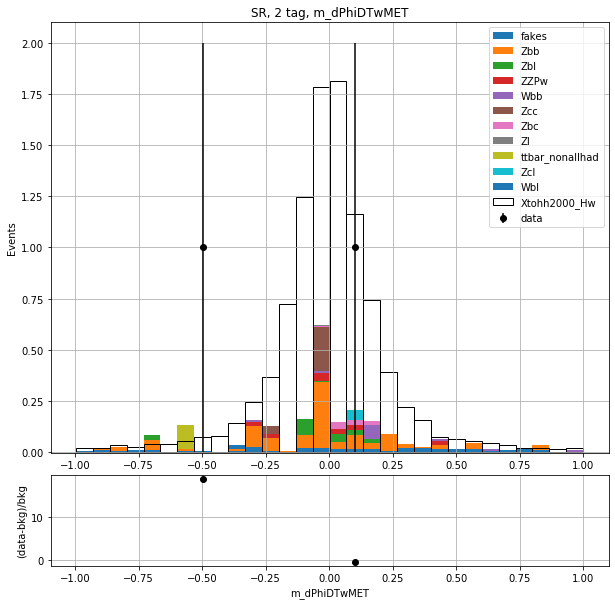

::: SR 2 m_MET
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.26759996e+00  3.69899078e+00  3.60333244e+00  1.71764891e+00
  3.52565780e+00  1.75629338e+00 -1.15129024e-01  3.36494040e-01
  5.85844897e-01  1.77236497e-02  2.63467799e-01  1.67562306e-01
  6.68616220e-02  4.32211757e-02 -5.08949161e-03  6.14237487e-02
 -2.27117538e-03 -2.38198042e-03 -1.26147270e-03 -6.71058893e-04
 -3.23563814e-04 -2.68489122e-04 -1.21951103e-04  1.10625163e-01
  0.00000000e+00  4.65985537e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.72247912 -0.41780885 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

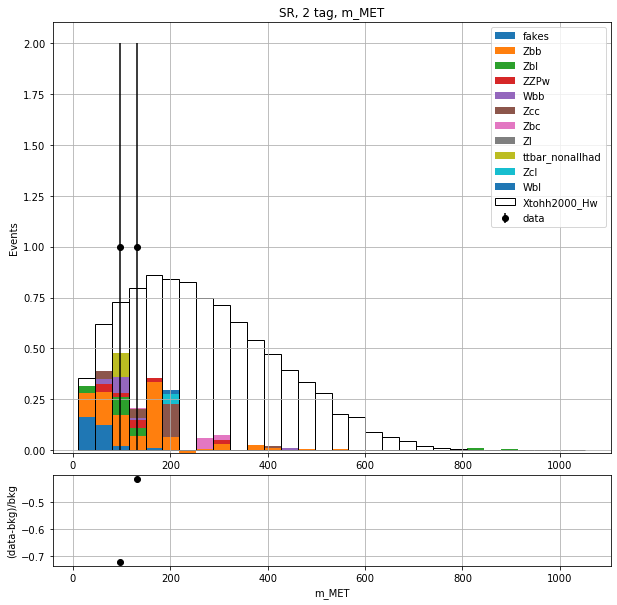

::: SR 2 m_hhm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 7.91673204e-01  2.19575835e+00  5.16277148e+00  4.22203332e+00
  1.97059831e+00  1.07082665e+00  1.70134641e+00  4.55463529e-01
  2.12976113e-01  1.19617239e-01  1.51915520e-01  1.65452763e-01
  1.63287610e-01 -1.90587938e-02  2.86566108e-01  8.38420391e-02
  8.34925771e-02  6.43079579e-02  6.21990561e-02  0.00000000e+00
 -1.29491091e-04  0.00000000e+00  3.92926931e-02  0.00000000e+00
 -4.85181808e-04  1.91977248e-02 -2.92092562e-04  5.33404946e-02
  0.00000000e+00  8.58378410e-02]
DIFF [-1.         -1.         -0.80630559 -1.         -0.49253991 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

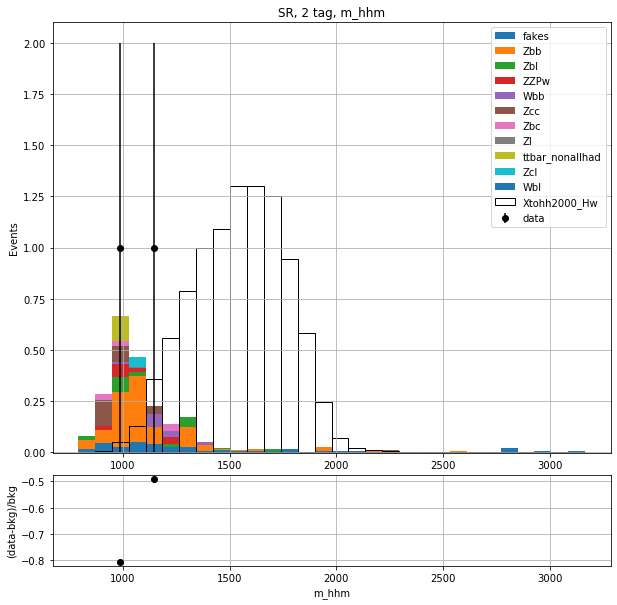

::: SR 2 m_bbttpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
Zl 1 0.0031457494
ttbar_nonallhad 1 0.12124851
Zcl 1 0.0485297
Wbl 1 0.019197725
DATA [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.95064850e+00  3.27202477e+00  2.13516774e+00  4.25937635e+00
  3.71471680e+00  1.51402935e+00  6.55897133e-01  3.70402366e-01
  5.43756843e-01  1.38897866e-01  1.06585592e-01  1.96019635e-01
  4.38151956e-02  9.33581991e-02 -2.98386812e-03  1.07985839e-01
 -2.09742785e-03 -4.95016575e-04  4.60937023e-02 -4.49776649e-04
 -3.07172537e-04 -1.95384026e-04 -2.50458717e-04  0.00000000e+00
  0.00000000e+00 -8.58902931e-05  0.00000000e+00  0.00000000e+00
 -3.83555889e-05 -4.26173210e-05]
DIFF [-1.         -1.         -0.06330544 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.      

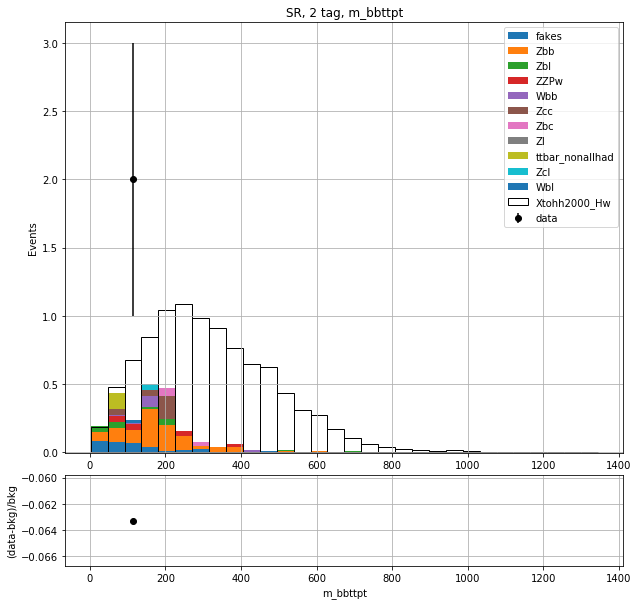

-->df.shape (28803, 19)
::: QCDCR 0 m_FJpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 8 20 36 46 23  9  6  1  4  2  1  1  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.78431815e+02  3.48903297e+02  5.55404827e+02  6.19791445e+02
  3.31319412e+02  1.88547337e+02  9.37993008e+01  5.91417196e+01
  3.03174415e+01  1.48777933e+01  1.14229753e+01  5.47985530e+00
  6.57511854e+00  2.19575548e+00  1.83567262e+00  6.03522778e-01
  9.72991943e-01  4.99733925e-01  3.52455139e-01  1.33125305e-01
  9.97390747e-02  2.36767769e-01  0.00000000e+00 -1.55639648e-03
  2.33459473e-03  0.00000000e+00 -1.81579590e-03 -3.11279297e-03
  0.00000000e+00  7.5927

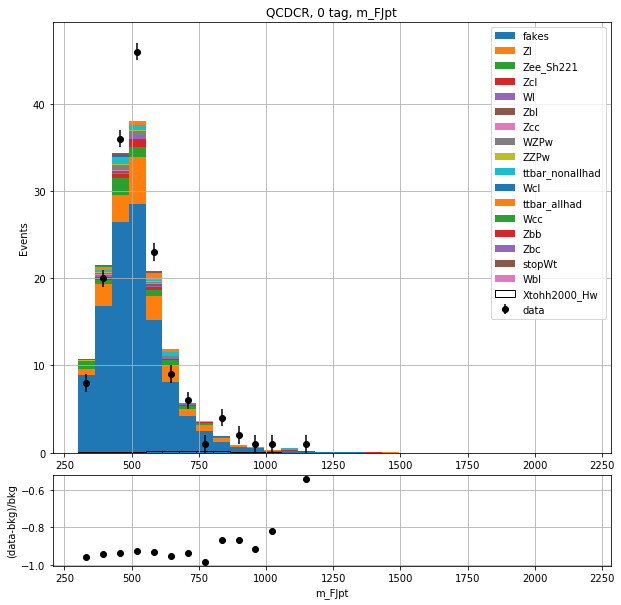

::: QCDCR 0 m_FJeta
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 5  2  2  5  4  3  6  5  4  6  6  8  6  6  9  2  5  6  6  6  5 12  8  5
  6  5  7  5  1  2]
BACK [ 35.54720127  37.74295909  59.86371773  62.44287083  63.8415041
  74.71236378  77.17742112  86.58024774 101.0486748   94.09482217
 100.65699454 104.84733788 112.5420786  109.00646225 108.27732904
 104.47373013 111.80567524 100.7420898  110.68642644  99.99907317
  93.92044125  88.14030737  98.62875049  93.25217537  67.05987191
  66.30831485  62.75742002  46.00225627  45.13597488  33.80269867]
DIFF [-0.85934195 -0.94700998 -0.96659078 -0.91992681 -0.93734483 -0.959846
 -0.92225706 -0.94225011 -0.96

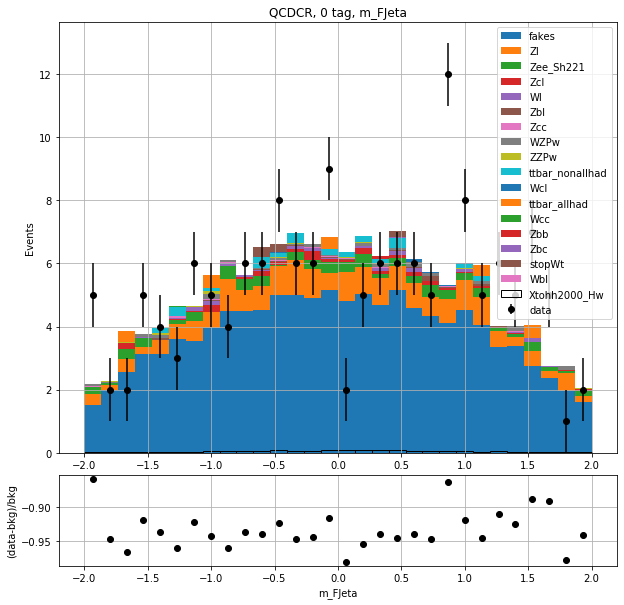

::: QCDCR 0 m_FJphi
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 7  3  5  1  5  4  5  5  5  4  7  5  7  2  7  5  5  7  5  4  6 10  7  2
  3  6  4  7  6  9]
BACK [72.93085753 89.01051584 85.18490961 83.18282735 82.46369817 96.78901416
 87.96608774 84.44807761 71.35300788 75.0810298  84.4703308  83.55376358
 80.65333873 79.15448161 85.83268136 84.67889044 79.70802701 71.05195951
 78.02611811 81.37798852 83.53423229 81.28937516 91.50298207 84.21421763
 78.92013437 76.92871228 79.21669281 75.26395744 79.42577708 83.8782397 ]
DIFF [-0.90401868 -0.96629612 -0.94130416 -0.98797829 -0.93936726 -0.958673
 -0.94315991 -0.94079202 -0.92992587 -0.94672423 -0.91713067

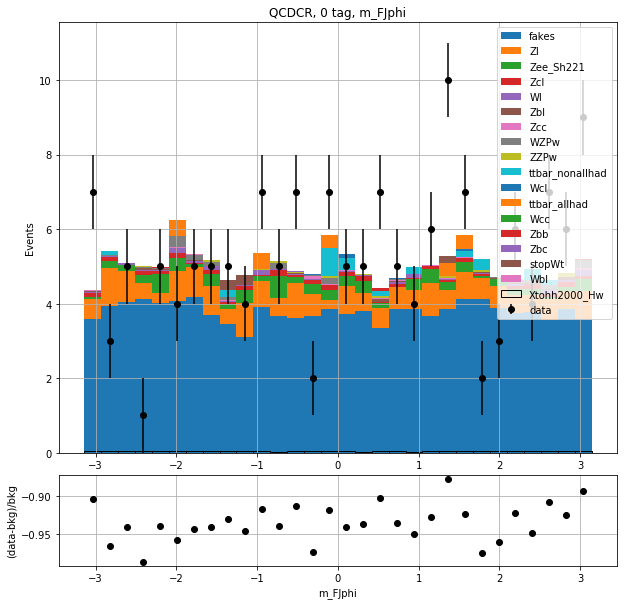

::: QCDCR 0 m_FJm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [54 23 22 15 10  5 10  4  1  6  2  4  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 6.82335422e+02  4.14560512e+02  2.95037397e+02  2.39580927e+02
  1.94637612e+02  1.54517319e+02  1.25180642e+02  9.85893918e+01
  7.92451552e+01  5.61168252e+01  4.17123950e+01  2.57187363e+01
  1.57257569e+01  1.00027694e+01  5.73212570e+00  4.50623202e+00
  1.73480892e+00  2.26012611e+00  9.38151836e-01  9.73919868e-01
  1.35715485e+00  7.92999268e-02  1.32476807e-01  2.83821106e-01
  7.33642578e-02 -1.16729736e-03  5.21240234e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-0.920860

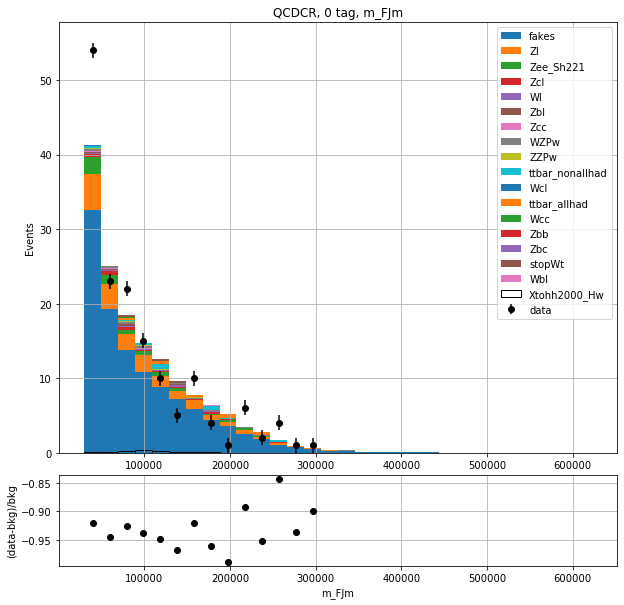

::: QCDCR 0 m_DTpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [14  6 36 48 22 11 11  4  3  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.39798114e+02  1.99085026e+02  5.14329473e+02  7.32441732e+02
  3.77184776e+02  2.08837258e+02  1.23430053e+02  6.16591785e+01
  4.13562564e+01  2.15480917e+01  1.18089451e+01  8.49457777e+00
  4.92185736e+00  2.40811491e+00  9.87739563e-01  1.38960266e+00
  4.17820930e-01  4.61967468e-01  1.32812500e-01  0.00000000e+00
  2.12112427e-01  0.00000000e+00 -1.94549561e-03  0.00000000e+00
  0.00000000e+00 -1.55639648e-03  2.33459473e-03 -1.81579590e-03
 -1.68609619e-03 -2.98309326e-03]
DIFF [-0.89985

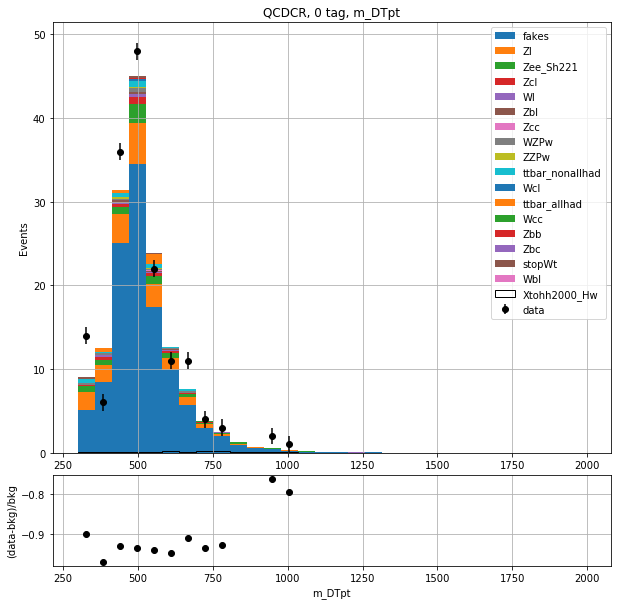

::: QCDCR 0 m_DTeta
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 4  7  5  4  1  5  5  6  3  7 13  8  2  7  4  6 10  8  6  4  3  6  4  5
  7  1  1  8  5  3]
BACK [ 38.56263689  52.11557315  61.65431006  47.32467945  25.05637224
  86.30098461  79.08859253  82.11718226  95.25757349 110.81349613
  88.6651342  124.47918394 114.20088516 114.64680877 121.84908281
 126.27973579 120.92937251 115.60448284 108.14810945  97.4902674
  93.0502507   89.58414826  79.77083972  64.85427991  84.00460365
  23.4952774   48.8268047   57.71283376  60.03866759  39.1768975 ]
DIFF [-0.89627265 -0.86568314 -0.91890267 -0.9154775  -0.96008999 -0.94206323
 -0.93677976 -0.92693368 -0.

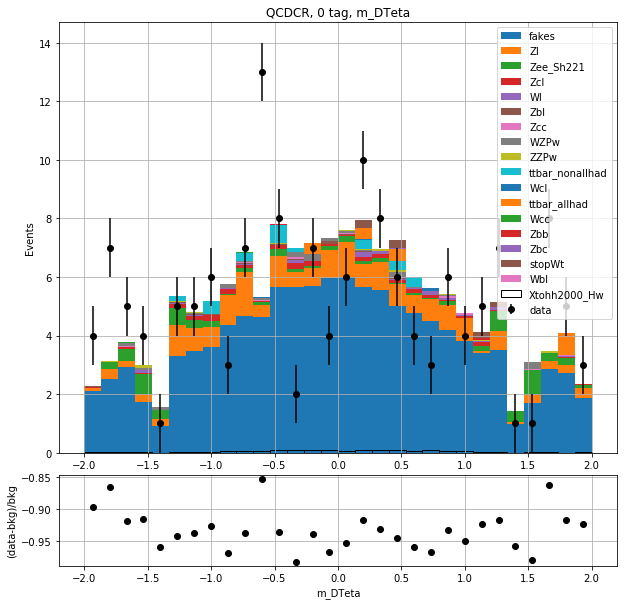

::: QCDCR 0 m_DTphi
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 3  7  6  5  3  6  7  6  4  6  4  6  5  5  8 11  2  5  1  6  4  6  2  4
  6  5  6  9  4  6]
BACK [86.49806196 84.80200853 74.20448035 75.67778382 78.93363682 83.95156123
 81.26157615 91.88743414 83.15013868 82.56701384 77.39661777 73.78985946
 83.43022019 77.30125184 76.66257899 77.11865351 84.22360933 89.8260554
 85.34998067 88.79145738 94.43406353 81.75002809 85.50803105 75.65303902
 68.97434366 80.83497155 87.72377115 78.75781638 80.78556271 79.8578802 ]
DIFF [-0.96531714 -0.91745479 -0.91914235 -0.93393041 -0.96199339 -0.92853022
 -0.91385843 -0.93470271 -0.95189425 -0.92733175 -0.9483181

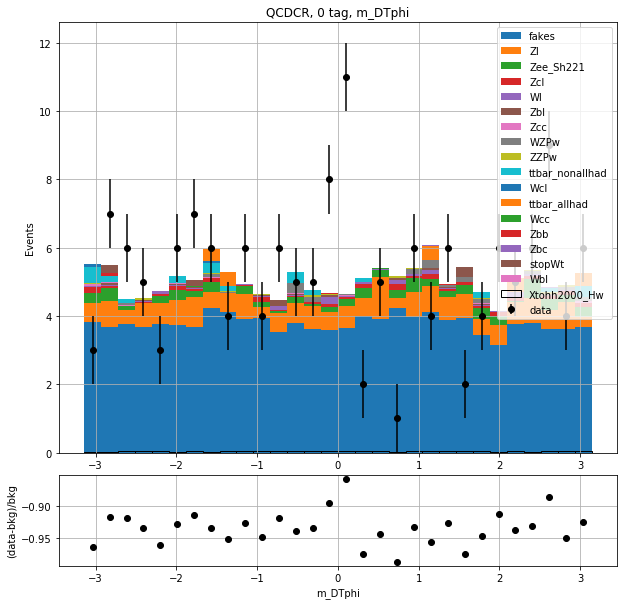

::: QCDCR 0 m_DTm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 1  3 14 33 27 29 12  9  4 12  4  8  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.46306012e+01  1.89661821e+02  3.28990910e+02  4.13388854e+02
  5.12262076e+02  3.12926292e+02  1.97554019e+02  1.53608783e+02
  1.11924901e+02  8.02122439e+01  4.80317636e+01  3.39611952e+01
  2.23532183e+01  1.06237048e+01  7.89221716e+00  5.17268372e+00
  2.67537272e+00  2.13498452e+00  1.05938721e+00  4.89486694e-01
  1.14383936e+00  2.63420105e-01 -1.68609619e-03  1.31385803e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.94549561e-03]
DIFF [-0.931650

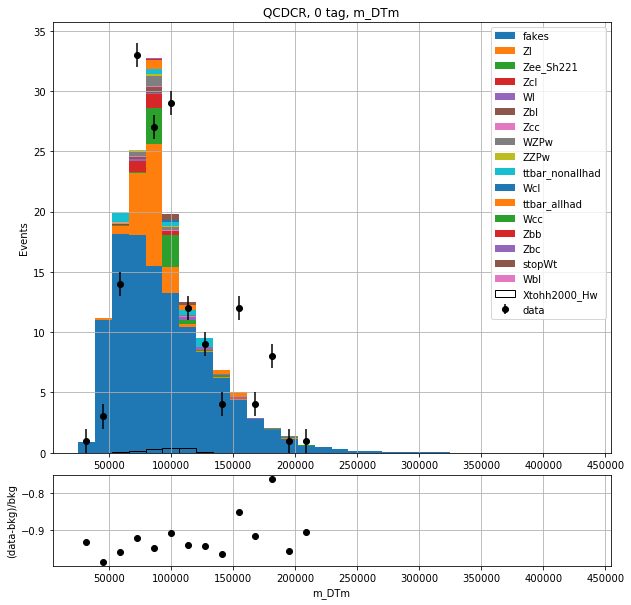

::: QCDCR 0 m_dPhiFTwDT
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4
  2  4 17 18 36 76]
BACK [-9.73566738e-03  1.23059366e-01  2.12910866e-01 -1.84780839e-02
  1.09356842e-01  5.43286772e-02  1.37817145e-01 -1.03728101e-03
  2.17096284e-01  9.00802463e-02  6.28463019e-01  4.43602055e-01
  1.16473460e+00  6.88964542e-01  9.23934624e-01  2.38221301e+00
  2.15927314e+00  4.27825440e+00  5.63653417e+00  8.75649324e+00
  1.55893555e+01  2.20336725e+01  2.99366615e+01  3.95223738e+01
  5.81705062e+01  9.31316574e+01  1.48164993e+02  2.34678947e+02
  4.98967370e+02  1.28291222e+03]
DIFF [-1.

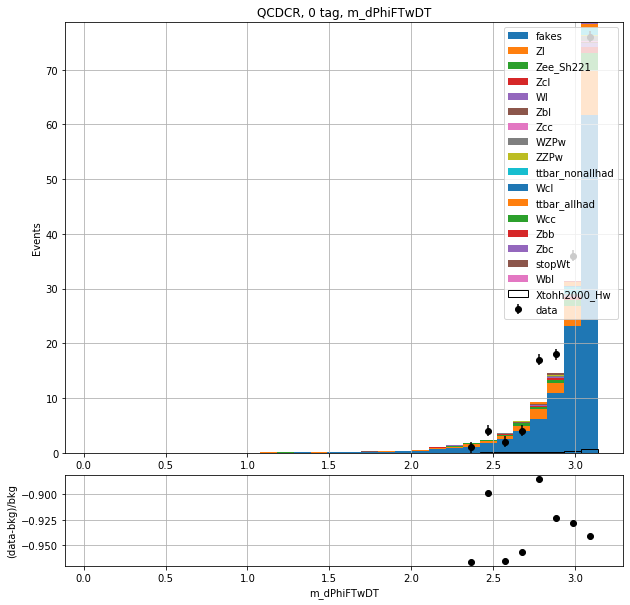

::: QCDCR 0 m_dRFJwDT
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  2  2  6 11 32 36 21 12 12  7  3  5  2
  3  2  1  1  0  0]
BACK [2.17349145e-01 1.31274902e-01 6.03277080e-01 4.99248495e-01
 7.52544057e-01 1.10971813e+00 2.04569835e+00 3.60923401e+00
 7.31822847e+00 1.39936322e+01 1.66910479e+01 3.06159217e+01
 4.93933685e+01 8.30327631e+01 1.59223602e+02 3.69324553e+02
 6.94400273e+02 3.53673551e+02 2.26065721e+02 1.45950225e+02
 9.94681844e+01 6.27922253e+01 4.80498757e+01 3.32552644e+01
 1.90842243e+01 1.12615359e+01 1.13072915e+01 3.85314941e+00
 2.25628233e+00 1.11684418e+00]
DIFF [-1.         -1.         -1.        

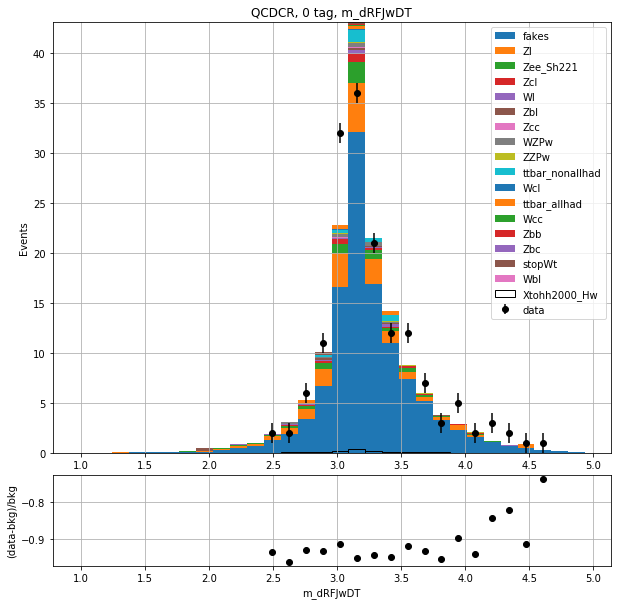

::: QCDCR 0 m_dPhiDTwMET
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [20 19  4  2 11  6  3  3  0  7  0  0  0  0  0  0  0  0  0  3  6  7  5  4
  2  8  5  8 15 20]
BACK [286.98821225 199.49015049 157.68919737 103.44646899  86.10255218
  72.70521301  66.69767667  63.57045622  67.87886585  76.51515452
  24.31523131   0.           0.           0.           0.
   0.           0.           0.           0.          18.4386926
  79.12718089  60.50350409  62.56248774  68.96901768  74.14711234
  92.44903871 119.08240012 160.83812019 220.13698292 289.45278389]
DIFF [-0.93031073 -0.9047572  -0.97463365 -0.98066633 -0.87224537 -0.91747497
 -0.95502092 -0.95280827 -1.   

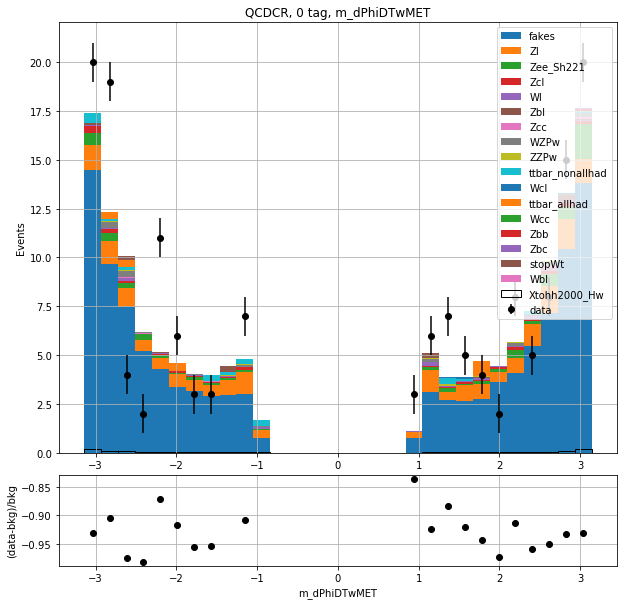

::: QCDCR 0 m_MET
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [89 50 12  4  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.50392159e+03  7.08719582e+02  1.73163100e+02  3.84820461e+01
  1.25215487e+01  5.85739300e+00  2.56550848e+00  2.10676813e+00
  5.30305862e-01  3.69301558e-01  1.99452114e+00  6.44418009e-01
 -6.53686523e-02  1.99592590e-01 -6.65359497e-02  1.53186798e-01
 -4.78591919e-02 -1.53045654e-02 -2.33459473e-03  0.00000000e+00
 -2.46429443e-03  5.20553589e-02 -1.94549561e-03  1.81579590e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.05828857e-03]
DIFF [-0.940821

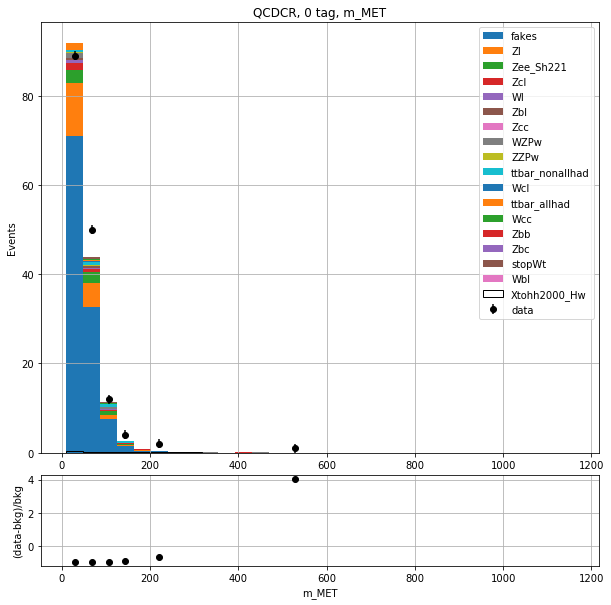

::: QCDCR 0 m_hhm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [ 0  0 10 31 47 22 10 10  9  6  3  2  0  4  0  1  0  0  1  0  0  0  1  0
  1  0  0  0  0  0]
BACK [3.73189079e-01 5.78046334e+00 1.81229964e+02 5.93833877e+02
 5.69985673e+02 3.78191513e+02 2.41540860e+02 1.55662032e+02
 1.08685820e+02 7.38751007e+01 4.34996414e+01 3.07698821e+01
 1.94328289e+01 1.56095128e+01 9.58484876e+00 8.28751230e+00
 3.72345269e+00 4.71725702e+00 2.07297948e+00 1.55074310e+00
 7.72529602e-01 2.73829937e-01 3.00804138e-01 3.97659302e-01
 2.33459473e-03 3.95973206e-01 5.68771362e-02 1.32812500e-01
 1.32812500e-01 1.31385803e-01]
DIFF [ -1.          -1.          -0.94482149 

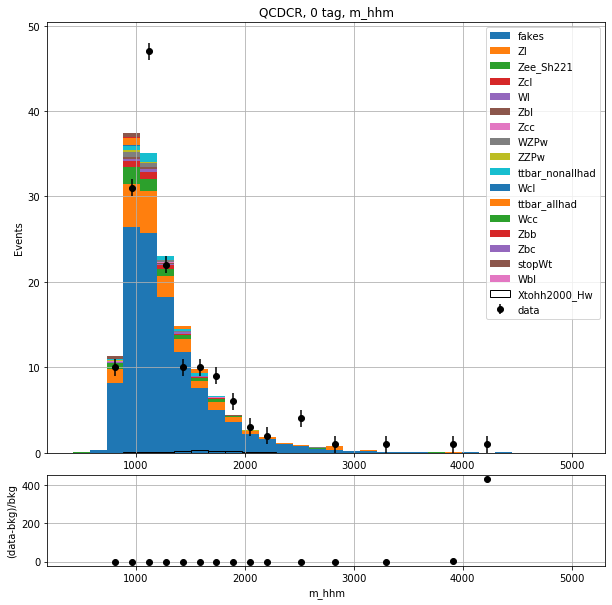

::: QCDCR 0 m_bbttpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
Zcc 36 0.33242136
WZPw 36 1.6278497
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
Zbc 3 0.045797616
stopWt 3 0.721092
Wbl 2 0.017798292
DATA [47 47 25 19 11  5  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 8.04880135e+02  7.09900395e+02  3.84324150e+02  2.33980541e+02
  1.27263153e+02  7.21872869e+01  4.34788146e+01  2.76923001e+01
  1.82742502e+01  9.97851479e+00  5.73542976e+00  4.25721657e+00
  2.47328810e+00  2.23354119e+00  1.39931744e+00  7.21443176e-01
  8.29230785e-01  4.18224335e-01  3.48823547e-01  1.35711670e-01
  1.32812500e-01  7.72933960e-02  1.35353088e-01  1.03436470e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.74841309e-02 -6.48498535e-04]
DIFF [-0.941

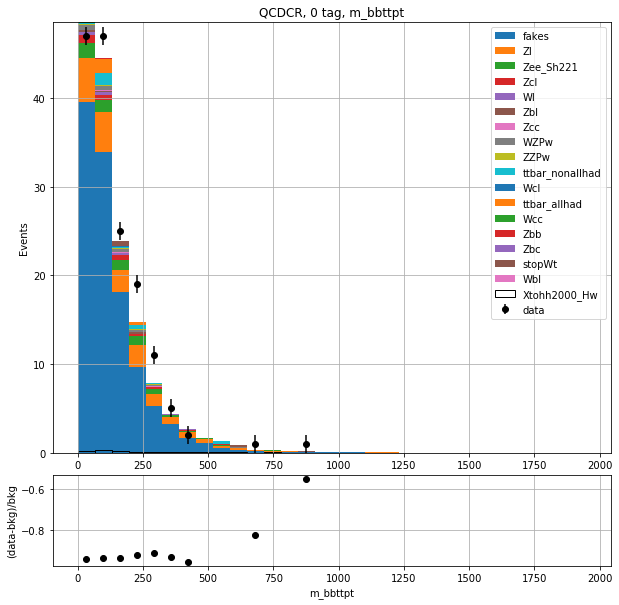

-->df.shape (6560, 19)
::: QCDCR 1 m_FJpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [1 2 3 5 3 5 2 3 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.97832580e+01  3.76882475e+01  5.16602068e+01  4.30705427e+01
  5.07727054e+01  3.60615367e+01  2.44701837e+01  1.41750217e+01
  6.63397826e+00  7.20935516e+00  5.31962467e+00  2.63482321e+00
  6.94456100e-01  1.18303075e+00  5.10345671e-01  4.32428926e-01
 -2.10456848e-02  3.03007007e-01  5.78498840e-02  2.06043243e-01
  2.37679660e-01 -5.49932718e-02  1.26390457e-01 -1.04713440e-03
  1.34283364e-01  0.00000000e+00 -1.80244446e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF

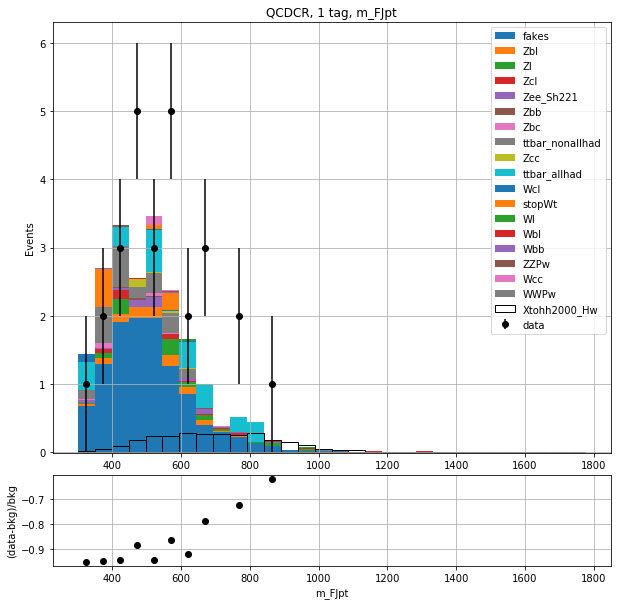

::: QCDCR 1 m_FJeta
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [0 2 0 0 0 0 3 2 0 2 0 0 0 1 2 0 3 1 1 1 3 1 1 2 0 0 1 1 0 0]
BACK [ 3.35296687  3.92791206  3.98943502  5.22656085  7.05141278  6.92735133
 15.4517621  10.57405911 14.28129571  9.02390992 15.28325306 17.20233952
 14.57970793 12.36427379 10.31190043 18.66497187 12.43338435 12.17070821
 16.91248418 19.26960042 12.61611435  9.33008098  6.57714513 11.56819998
  7.58906654  6.63592747  8.86323854  4.29563713  3.70694292  3.10355568]
DIFF [-1.         -0.49082363 -1.         -1.         -1.         -1.
 -0.80584739 -0.81085788 -1.         -0.77836658 -1.         -1.
 -1.         -

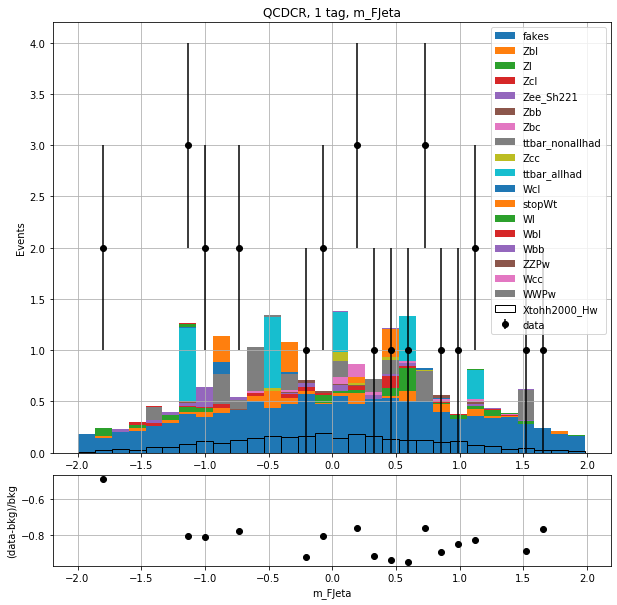

::: QCDCR 1 m_FJphi
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [3 0 0 1 1 0 1 1 0 2 3 3 0 0 0 1 1 1 0 1 0 1 0 1 1 3 1 0 0 1]
BACK [ 9.38014696  7.60478739  9.17142805 13.72154437 11.24751706 12.34329317
  9.92532955  9.46134176 11.44654299 12.42144635  8.9869637  11.09991585
  9.85304054 11.05433616 10.25114539  5.6777389   5.9880352   7.33734643
 10.50771991  7.81303428 11.38021813 12.31833646  8.41470996 12.27150589
  7.54612355 11.84523427 11.27540559 14.81485554  5.79168099 12.33492291]
DIFF [-0.68017559 -1.         -1.         -0.92712191 -0.91109149 -1.
 -0.89924768 -0.89430675 -1.         -0.83898815 -0.66618314 -0.72972768
 -1.  

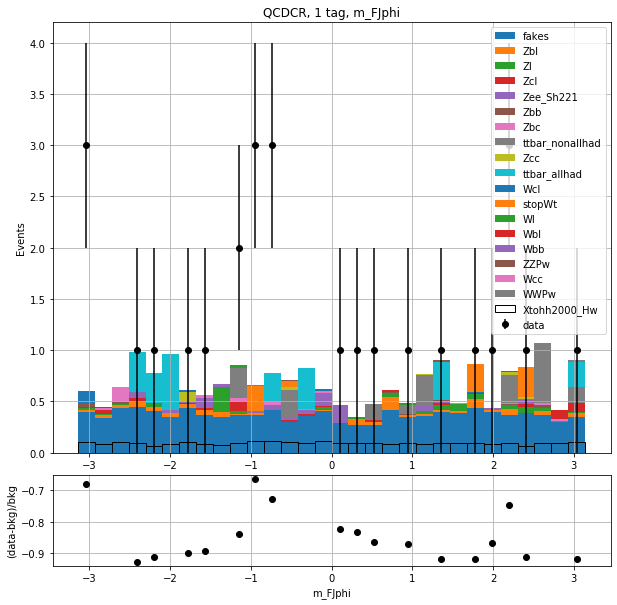

::: QCDCR 1 m_FJm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [5 5 2 3 2 3 1 1 1 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 6.00893468e+01  2.77282823e+01  3.79863418e+01  2.95704524e+01
  2.74050955e+01  2.39226876e+01  1.95924045e+01  1.37442690e+01
  2.52256724e+01  7.71092796e+00  9.52151614e+00  5.96721961e+00
  3.74568170e+00  4.98672488e+00  2.13819158e+00  5.87459564e-01
  1.33190000e+00  6.23765945e-01  6.49901390e-01 -1.38359070e-02
  6.99453354e-01  1.56380832e-01  7.55922794e-02  8.83109570e-02
  0.00000000e+00 -3.96881104e-02 -5.83477020e-02 -1.00810647e-01
  0.00000000e+00 -4.93011475e-02]
DIFF [-0.91679057 -0.8196787

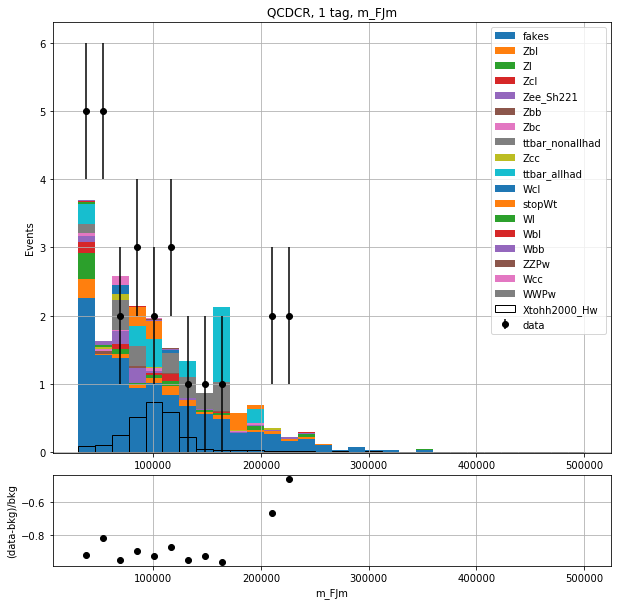

::: QCDCR 1 m_DTpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [1 2 1 3 5 4 3 2 2 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.22804213e+01  1.23797953e+01  1.62928350e+01  2.99852199e+01
  6.16849302e+01  4.65936326e+01  3.22679735e+01  2.73151734e+01
  2.44277404e+01  1.41004971e+01  9.14838487e+00  5.55034960e+00
  2.62093402e+00  2.25141960e+00  1.71884217e+00  1.14483863e+00
  1.13653868e+00  8.13056946e-01  8.27081680e-01  1.36075974e-01
  3.34874332e-01 -4.46319580e-04  1.38204575e-01 -1.18446350e-03
 -3.77655029e-04  0.00000000e+00  0.00000000e+00  1.40693665e-01
  0.00000000e+00  0.00000000e+00]
DIFF [-0.91856957 -0.838446

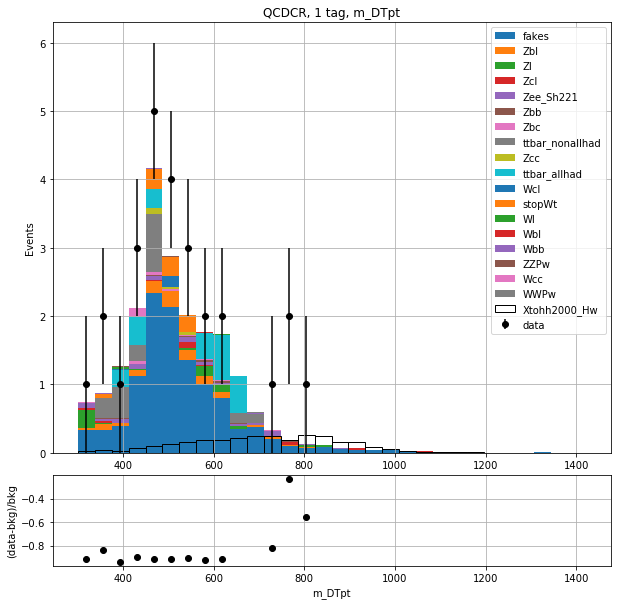

::: QCDCR 1 m_DTeta
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [2 3 1 0 1 0 1 1 0 1 2 1 0 0 0 0 1 1 1 1 2 1 1 0 1 0 2 0 3 0]
BACK [ 5.33884732  6.54211874  8.04825113  2.67713084  2.55958547 10.94852431
  5.36359333  9.91482841 10.93997003  9.17138583 10.63344354 18.87686575
 13.0329815  19.51880463 16.2939094  15.96576993 14.80945836 11.90830938
 14.71007606 16.52692235  8.93364866 10.29511236 11.29192348 11.98487125
 10.47328222  1.50569564  4.69982287  6.29613197  5.72063088  8.30354482]
DIFF [-0.6253873  -0.54143296 -0.8757494  -1.         -0.60931174 -1.
 -0.81355783 -0.89914097 -1.         -0.89096522 -0.81191418 -0.9470251
 -1.   

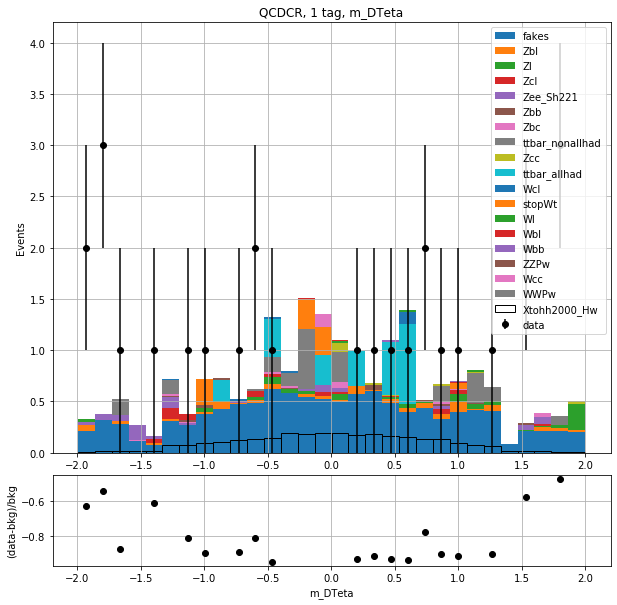

::: QCDCR 1 m_DTphi
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [1 1 1 0 1 0 1 0 1 1 1 3 0 1 2 1 0 0 2 0 0 1 2 0 0 3 2 1 0 1]
BACK [ 8.26895502  4.55653736  8.51812664 11.69768963  7.46520763  8.77626269
  9.78061488 12.59848833  8.481998   10.66226591 10.65638971 11.61130048
  9.21394299 12.47799759 12.25895238  7.69310035  7.03553099 15.34066261
  8.67024149 10.50307059 13.68636785 11.2997344  10.41490238 11.32899024
  9.61634947  9.60598721 11.45894828  9.46258574 10.43913496  9.70506045]
DIFF [-0.87906573 -0.7805351  -0.88260329 -1.         -0.86604525 -1.
 -0.89775694 -1.         -0.88210325 -0.90621131 -0.90615959 -0.74163101
 -1.  

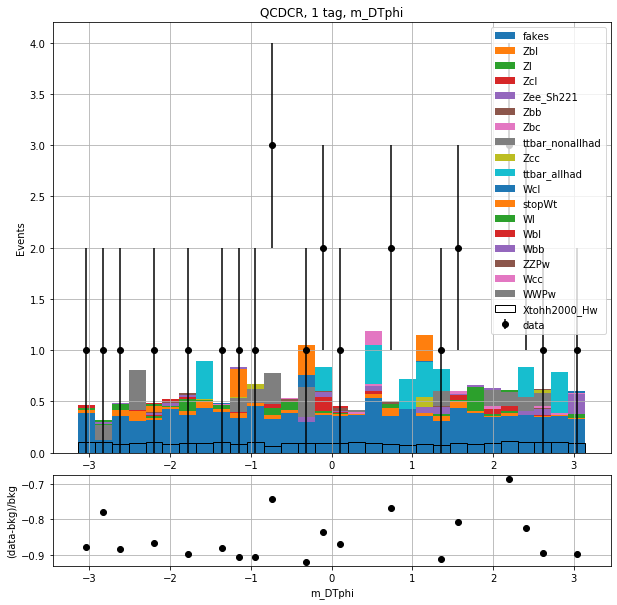

::: QCDCR 1 m_DTm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [1 1 3 2 3 2 5 3 1 0 2 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.20256782e+00  1.21643441e+01  2.21053672e+01  3.53983374e+01
  3.96697817e+01  4.79495135e+01  3.08757709e+01  1.66821312e+01
  1.68537896e+01  1.53333854e+01  2.16340697e+01  7.84961283e+00
  1.20412230e+01  4.43566322e+00  7.85247329e+00  2.12959671e+00
  3.54960418e+00  6.96567535e-01  1.56460741e+00  3.39927676e-01
  5.35360336e-01  6.21235926e-01  2.75207520e-01  1.17931366e-01
  1.37432098e-01 -5.49316406e-03  0.00000000e+00  1.38839722e-01
  1.40693665e-01 -3.74221802e-03]
DIFF [-0.54598447 -0.9177925

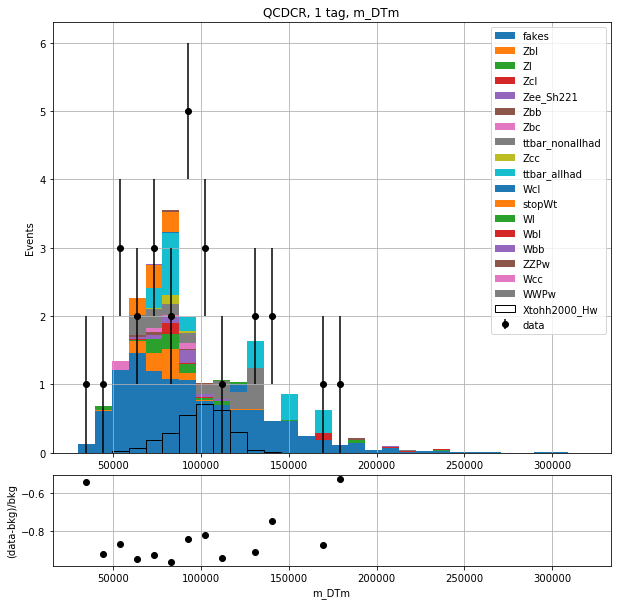

::: QCDCR 1 m_dPhiFTwDT
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  0  1  3  5 16]
BACK [-1.82346313e-02  0.00000000e+00  1.32332314e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.73060240e-03  1.54919474e-01
 -2.00127997e-02 -1.73562393e-02  7.54238945e-02  4.85475203e-01
  1.70297571e+00  8.64721052e-02  1.41010765e-01  2.21129296e+00
  7.98633143e-01  8.16306327e-01  1.34870502e+00  2.06658916e+00
  1.67414816e+00  2.44699347e+00  2.97791262e+00  5.57407955e+00
  8.72703790e+00  1.59812304e+01  2.57216948e+01  3.00823523e+01
  7.02484401e+01  1.29884

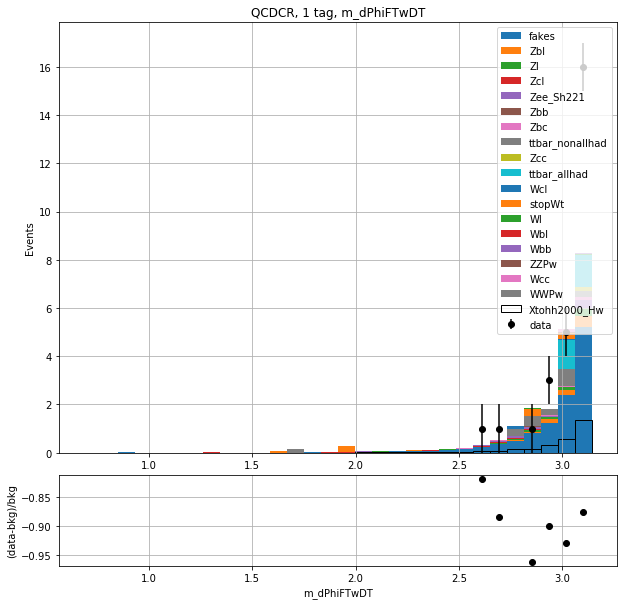

::: QCDCR 1 m_dRFJwDT
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 9 4 2 2 0 1 1 1 0 0 1 0 0 0]
BACK [ 1.40688468e-01  1.57650076e-01 -2.65907831e-02  1.97935535e-01
 -2.30328832e-02  4.14027944e-01  1.77013137e+00  2.09080305e+00
  8.66465360e-01  1.21227756e+00  2.15511383e+00  2.44506846e+00
  5.17129192e+00  1.29348471e+01  1.52945554e+01  3.77413831e+01
  7.20462402e+01  4.68140427e+01  4.14578174e+01  1.87871748e+01
  1.75925144e+01  7.43097588e+00  5.71834171e+00  4.63363685e+00
  2.11184692e+00  1.01753998e+00  9.72410202e-01  5.21936417e-01
  1.12482834e+00  5.13971329e-01]
DIFF [-1.         -1.   

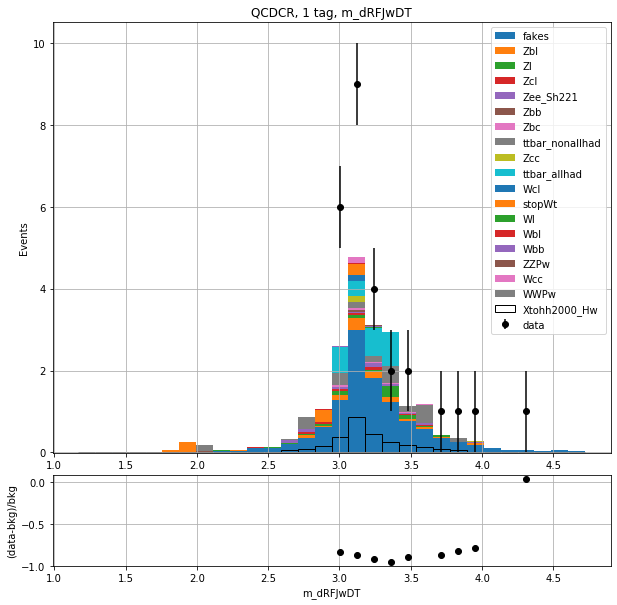

::: QCDCR 1 m_dPhiDTwMET
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [4 0 4 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 2 1 1 6]
BACK [49.63425586 30.89580843 20.9609984  12.26171458 11.19352401  7.27707807
  7.00350156  8.96607181  4.75139675  9.74872434  1.34436196  0.
  0.          0.          0.          0.          0.          0.
  0.          1.94973852  5.66222651  6.98531007  5.37947897  5.70183377
  6.13459399 10.7497368  12.3004484  13.23426148 27.97805209 43.17245869]
DIFF [-0.9194105  -1.         -0.8091694  -0.83689067 -1.         -1.
 -0.85721428 -1.         -1.         -0.89742248 -1.                 nan
         nan     

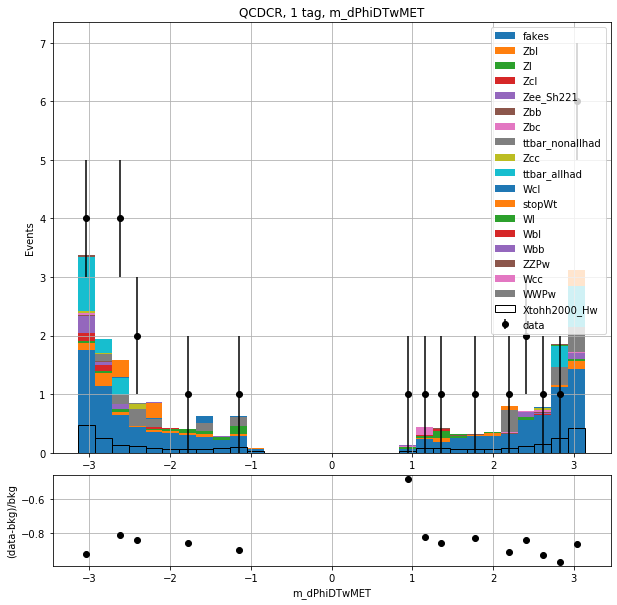

::: QCDCR 1 m_MET
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [ 3 14  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 9.31805739e+01  8.26985308e+01  4.64997298e+01  3.53621317e+01
  1.54133775e+01  1.22717233e+01  1.07800112e+01  1.97586921e+00
  2.10266578e+00  1.12261903e+00  1.18970082e+00 -1.48332275e-01
  4.18096542e-01  3.02982330e-02  7.68013000e-02  2.06800461e-01
  1.00782394e-01  9.83276367e-02 -3.43322754e-05 -1.80587769e-02
 -4.41684723e-02 -2.05993652e-04 -1.28917694e-02 -2.57492065e-04
 -2.23159790e-04  0.00000000e+00 -1.81274414e-02  0.00000000e+00
  0.00000000e+00 -2.05993652e-0

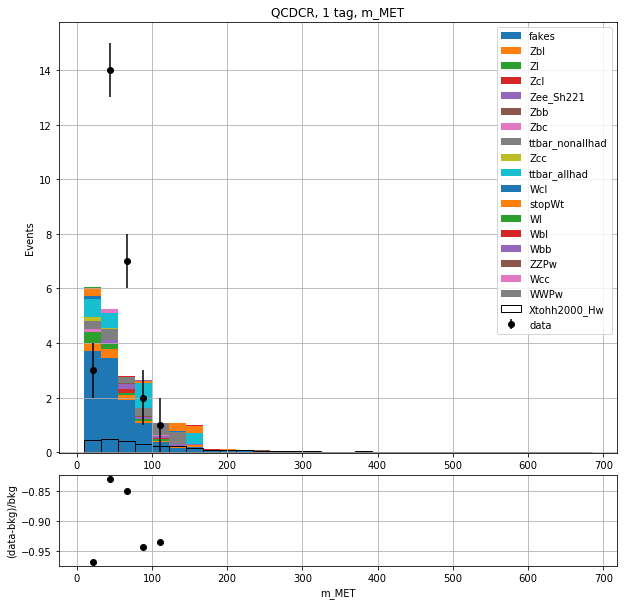

::: QCDCR 1 m_hhm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [0 0 0 4 7 4 2 2 1 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.87098836e-02  3.63303412e-01  2.10102678e+01  5.78423023e+01
  5.38937121e+01  4.65163411e+01  4.15637073e+01  2.27162024e+01
  1.66435987e+01  1.65013340e+01  5.76244420e+00  6.78038058e+00
  2.97889988e+00  3.32430279e+00  2.00091678e+00  1.24415016e+00
  3.70822906e-01  7.23140717e-01  4.30289805e-01  8.64589691e-01
  5.37128448e-01  3.75680923e-01  1.94866799e-01  1.40693665e-01
  4.22080994e-01 -1.80244446e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.64794922e-03]
DIFF [-1.         -1.       

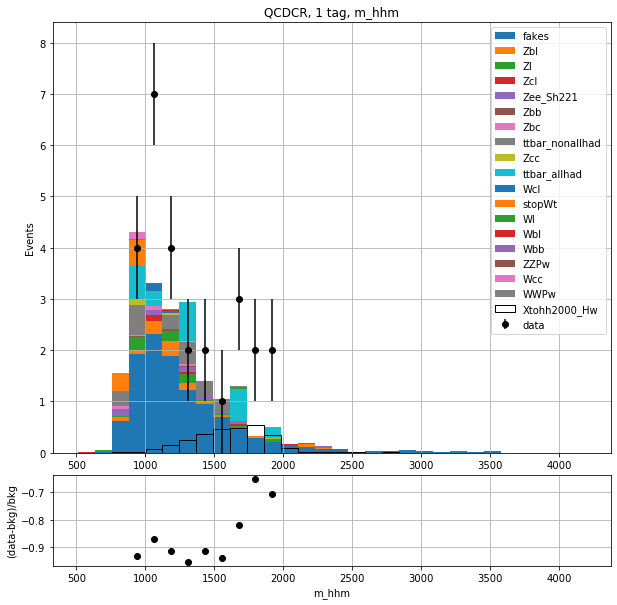

::: QCDCR 1 m_bbttpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wl 3 0.055728532
Wbl 3 0.030329425
Wbb 3 0.03694246
ZZPw 2 0.03583426
Wcc 2 0.13590297
WWPw 1 0.02100775
DATA [10  5  4  2  1  2  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 5.11843059e+01  7.68809235e+01  5.79763751e+01  4.74259760e+01
  2.44892717e+01  1.41977111e+01  7.85185715e+00  5.33580202e+00
  5.13422108e+00  2.71336439e+00  2.58983076e+00  8.58865827e-01
  2.49321904e+00  2.60045922e+00  1.73824400e-01  3.29716235e-01
  4.17823792e-02  1.16355896e-01  1.49566650e-01 -4.46319580e-04
  3.55682373e-02  2.03075409e-01  3.30519676e-03  1.04208231e-01
  1.22481346e-01  2.74977028e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.04713440

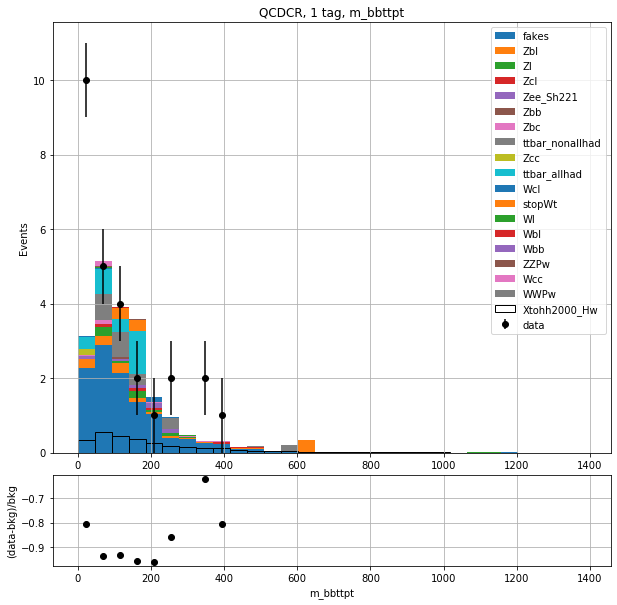

-->df.shape (2306, 19)
::: QCDCR 2 m_FJpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.45721425e-01  1.18756184e+00  1.09785287e+00  2.69884074e+00
  2.83697121e+00  1.80657634e+00  2.31920005e+00  7.69645587e-01
  4.74388123e-01  3.57422575e-01  1.58971786e-01  2.31834650e-01
  2.12315768e-01  1.21678352e-01 -2.68459320e-03  1.95786953e-02
  3.76338959e-02  6.10266626e-02 -7.40051270e-04 -1.20162964e-04
 -2.06947327e-04  3.85208130e-02 -3.24249268e-04  0.00000000e+00
  0.00000000e+00 -4.00543213e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.08913114 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1. 

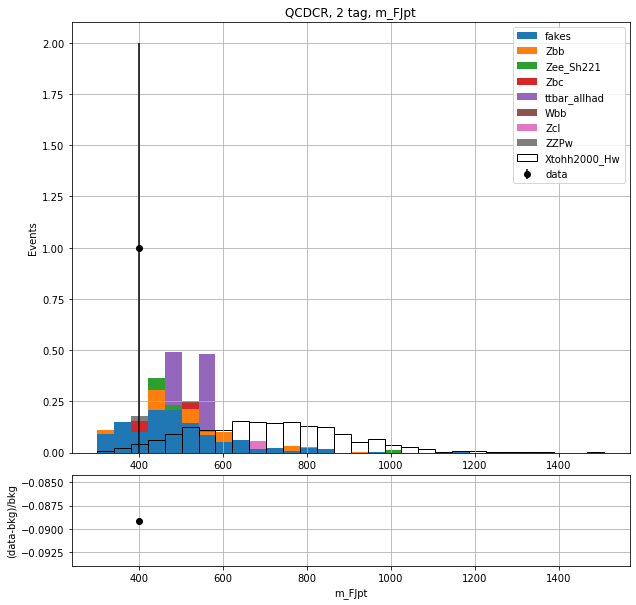

::: QCDCR 2 m_FJeta
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.05945702 0.12833185 0.39530572 0.30811995 0.2440345  0.18922269
 0.34298527 0.54496864 2.25734246 0.41241574 0.60430661 0.59229231
 0.61477204 0.5468858  0.90293706 0.42576824 0.56920871 1.11563098
 1.50385812 0.5436378  0.41288196 0.54265341 0.44650412 0.450243
 0.32344231 0.31591552 0.06278133 0.20960808 0.14171791 0.06439781]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.          0.83496796 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


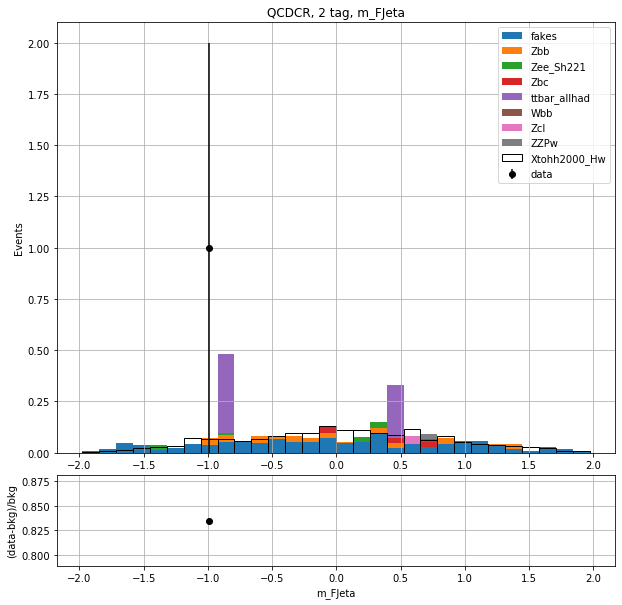

::: QCDCR 2 m_FJphi
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
BACK [0.32749506 0.42254297 0.33988816 0.57158007 1.36990833 0.55399776
 0.46804912 0.27603507 0.49631891 0.46057339 0.51886718 0.74358036
 0.15953612 0.13561416 0.52058357 0.38404894 0.31083393 0.37874374
 0.47075021 0.56736917 0.34348488 0.49384184 0.48367183 0.40916397
 0.70018858 0.45922654 0.34033033 1.8900665  0.23088571 0.44444656]
DIFF [-1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.         1.9383217 -1.        -1.        -1.       ]


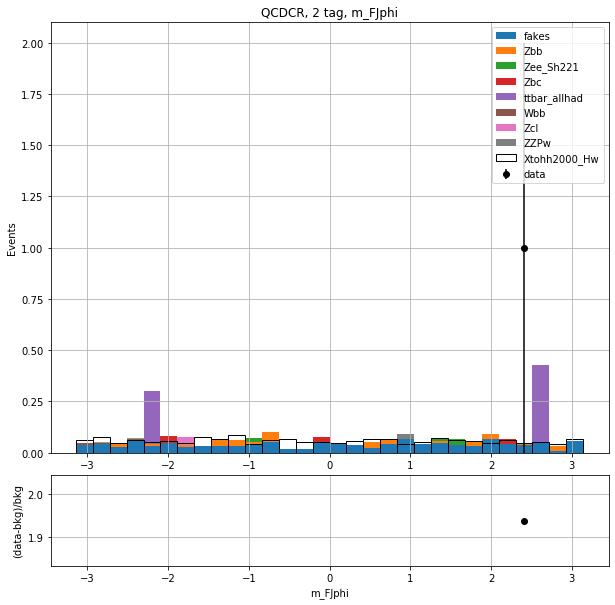

::: QCDCR 2 m_FJm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.27851092e+00  1.19980285e+00  1.76572041e+00  1.75468063e+00
  8.46467465e-01  1.06488079e+00  2.38279819e-01  7.77364254e-01
  9.26290989e-01  4.87487750e-01  3.40483427e-01  4.75714207e-01
  2.96072173e+00  2.40092278e-01  7.68346786e-02  4.95364785e-01
  3.86581421e-02 -8.12721252e-03  1.40475273e-01  6.24265671e-02
  8.81528854e-02 -1.60779953e-02  3.79459560e-02 -4.31060791e-04
 -4.67300415e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.95910645e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
  3.19674651 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

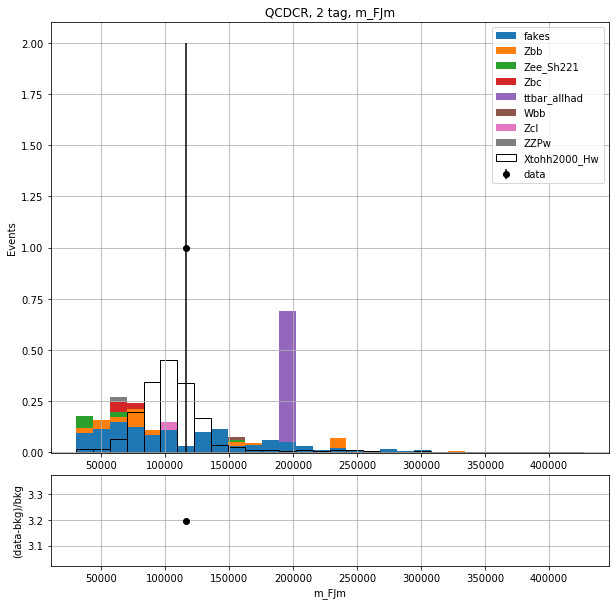

::: QCDCR 2 m_DTpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.84883967e-01  3.39142939e-01  5.19176191e-01  8.27411538e-01
  2.62826722e+00  3.69864322e+00  2.89927788e+00  6.48266377e-01
  1.03516262e+00  7.85824344e-01  5.67980550e-01  3.71542305e-01
 -3.81399244e-02  5.94652623e-01 -3.72791290e-03  5.88779449e-02
 -3.75461578e-03 -1.21784210e-03 -8.72612000e-04 -5.81741333e-04
  6.15168512e-02  0.00000000e+00 -2.56538391e-04 -6.77108765e-05
 -8.67843628e-05 -9.91821289e-05 -1.87873840e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -1.         -1.         -1.         -0.72963059
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1

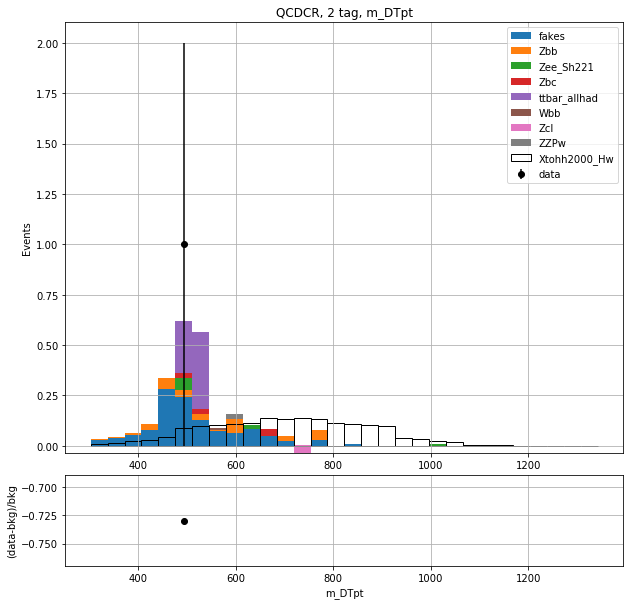

::: QCDCR 2 m_DTeta
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.22283317 0.17996117 0.58702398 0.22956541 0.03873289 0.46110247
 0.31589697 0.48056722 0.3943013  0.85469389 2.11593289 0.75932413
 0.43450785 0.4986638  0.66357565 0.48401138 0.56630698 0.48087439
 0.42199098 0.55464801 1.99466282 0.59623486 0.35425854 0.51564976
 0.20741674 0.26642609 0.0887022  0.11092399 0.09186649 0.30096817]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.          0.76582673 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


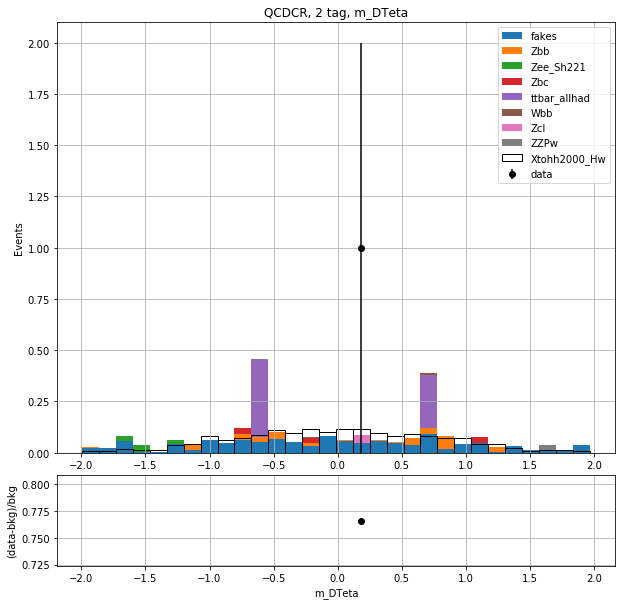

::: QCDCR 2 m_DTphi
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.49120439 0.28000057 0.12566197 0.63160693 0.61622893 0.43392743
 0.47554979 0.52469129 0.52766632 0.61141586 0.25281024 0.42356148
 1.85675704 0.45313946 0.40324715 0.32718468 0.41355848 0.23063898
 1.66313381 0.26283202 0.39717142 0.4327406  0.45015993 0.20382118
 0.88614765 0.30821231 0.67668641 0.44630866 0.16093826 0.30461788]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.46142658 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


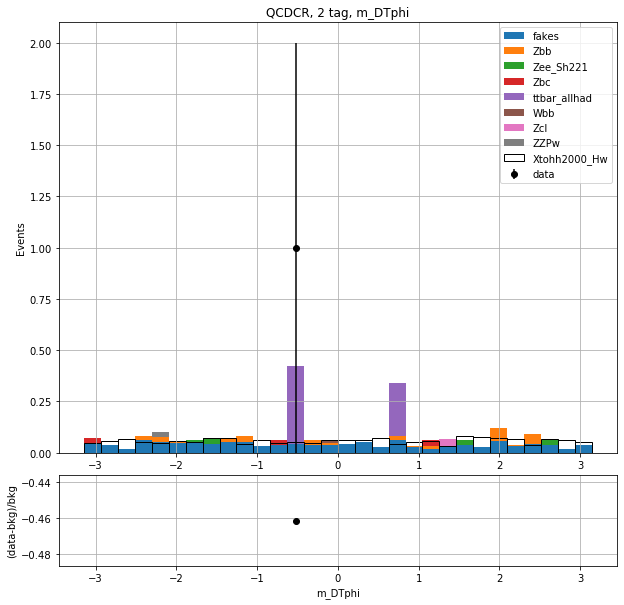

::: QCDCR 2 m_DTm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.15434936  0.21915984  0.60137438  0.627038    1.40520189  1.01152266
  0.75879304  1.21108225  1.6395043   0.38841628  0.63643188  2.16284579
  0.5535259   0.31257868  1.39963996  0.60399957  0.15658617  0.02303028
  0.26642799  0.20310497  0.15438652  0.33090591 -0.02186584  0.09239483
  0.          0.09116077  0.11350918  0.12505722  0.          0.05146217]
DIFF [-1.        -1.        -1.        -1.        -1.        -0.0113914
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
        nan -1.        -1.        -1.               nan -1.       ]


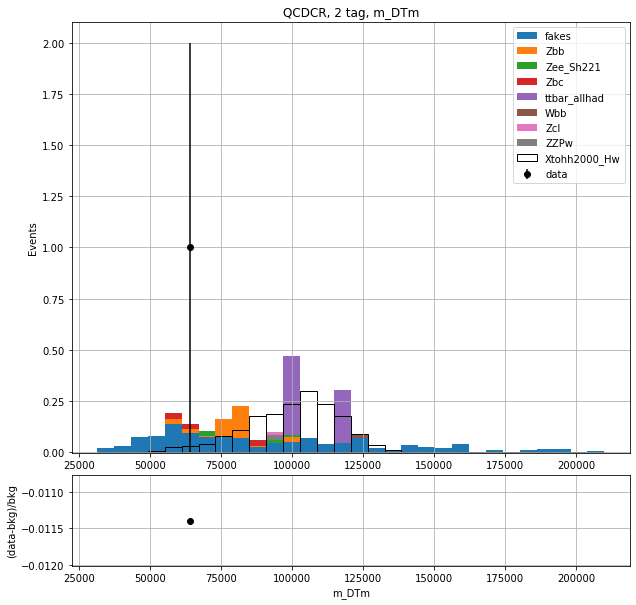

::: QCDCR 2 m_dPhiFTwDT
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
BACK [-4.07147963e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.57126391e-02  2.27149744e-02  0.00000000e+00
 -2.97389925e-05  6.23977929e-02  5.14620394e-02 -1.91032887e-04
  3.86815369e-02 -8.60165060e-03  6.21152669e-02  3.88955658e-02
 -1.00835264e-02  5.10963500e-02  7.36294994e-02  1.42465532e-01
  3.58180098e-01  7.94951320e-02  2.82006595e-01  4.21707630e-01
  5.67726906e-01  6.83092844e-01  1.85709484e+00  3.57102594e+00
  3.01223111e+00  3.88884238e+00]
DIFF [-1.                 nan         nan         nan         nan -1.
 -1.                 nan -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.  

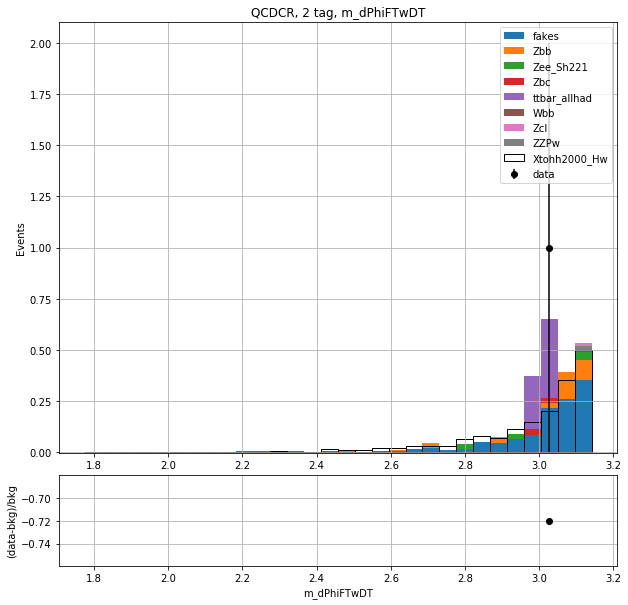

::: QCDCR 2 m_dRFJwDT
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.87634188e-02 -1.30411237e-04  6.24165796e-02  2.55177617e-02
  2.12482214e-02  3.68033201e-02  1.95515054e-01  3.81279383e-01
  6.64207552e-01  1.87501431e-01  4.00304742e+00  2.82162459e+00
  1.78502644e+00  1.17964872e+00  8.54795188e-01  7.44350553e-01
  6.33800983e-01  4.04983759e-01  4.37174484e-01  2.36951292e-01
  8.47492218e-02  9.00630951e-02  2.81305313e-01  0.00000000e+00
  7.71751404e-02  0.00000000e+00  0.00000000e+00 -1.49936676e-02
  0.00000000e+00  3.87935638e-02]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.43978421 -1.         -1.         -1.         -1.         -1.
 -1.    

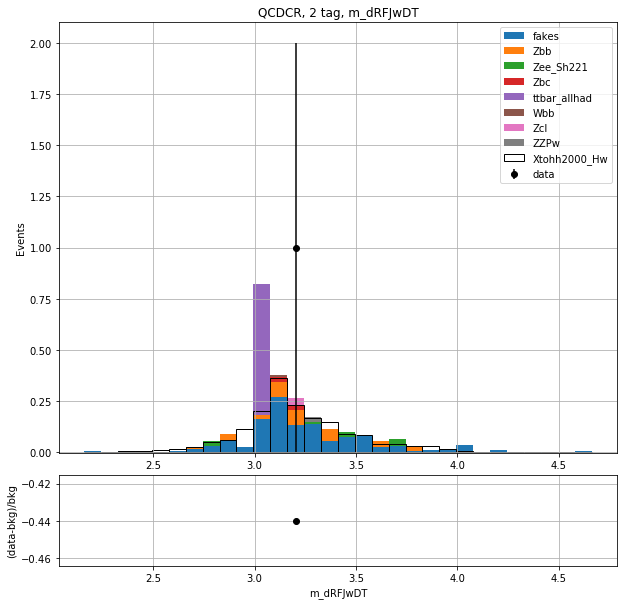

::: QCDCR 2 m_dPhiDTwMET
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
BACK [ 2.26397878  1.25500781  0.99439659  0.92911449  0.53826594  2.67140412
  0.32670784  0.15256453  0.07597208  0.12620211 -0.03419781  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01441431  0.49643796  0.25466061  0.42302585  0.43879415
  0.20229673  0.41681685  0.36414954  0.35940647  1.36655085  1.66448683]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.                 nan
         nan         nan         nan         nan         nan         nan
         nan -1.         -1.         -1.         -1.         -1.
 -1.          1.39913528 -1.         -1.         -1.         -1

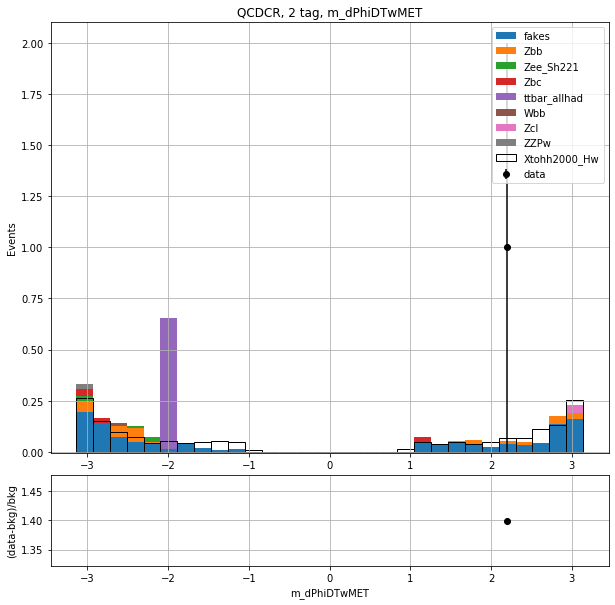

::: QCDCR 2 m_MET
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.76506334e+00  5.97495693e+00  2.57626691e+00  1.00914024e+00
  9.21614561e-01  3.71630490e-01  3.05686206e-01  5.78632355e-02
  1.79252628e-01 -8.37326050e-04 -9.55581665e-04  6.18801117e-02
  5.11617661e-02 -8.39233398e-05 -2.16484070e-04 -9.15527344e-05
 -1.70707703e-04 -1.00135803e-04 -2.95639038e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.29696655e-05 -1.95503235e-04
  0.00000000e+00 -1.30653381e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -0.83263478 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

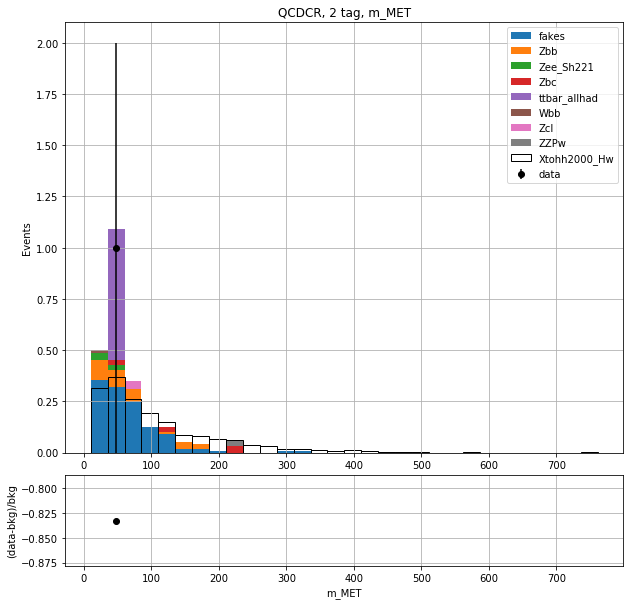

::: QCDCR 2 m_hhm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.94634914e-01  6.08042182e-01  1.33107347e+00  1.13133104e+00
  2.90084644e+00  3.12279372e+00  7.73702711e-01  1.01041927e+00
  1.13176647e+00  7.91190132e-01  4.91418466e-01  3.10873985e-01
  4.44886208e-01  4.50839996e-02  1.75561905e-01  2.12444305e-01
  1.23468399e-01 -5.10215759e-04  5.13734818e-02  2.21604586e-01
  6.18267953e-02  5.14621735e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.87935638e-02 -1.49936676e-02  0.00000000e+00
  0.00000000e+00  6.25286102e-02]
DIFF [-1.         -1.         -1.         -1.         -0.65527303 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

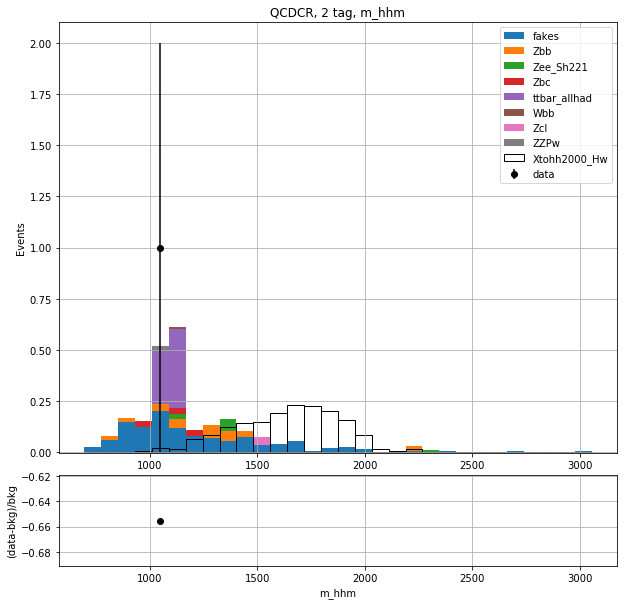

::: QCDCR 2 m_bbttpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
ttbar_allhad 2 0.64112276
Wbb 2 0.0120642735
Zcl 1 -0.039604582
ZZPw 1 0.024872046
DATA [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.87979595e+00  5.88141013e+00  2.23406943e+00  1.77191682e+00
  1.03354962e+00  8.13075420e-01  2.49856517e-01  8.31778131e-01
  2.22774714e-01  3.40101421e-02  1.12669945e-01 -8.73565674e-04
 -1.64556503e-02  3.76274288e-02  6.21442795e-02  2.53219604e-02
 -1.93595886e-04 -1.07765198e-04  2.20115185e-02  3.86171341e-02
  0.00000000e+00 -1.11579895e-04 -2.57492065e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.00543213e-05  3.87935638e-02
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.55238634 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.     

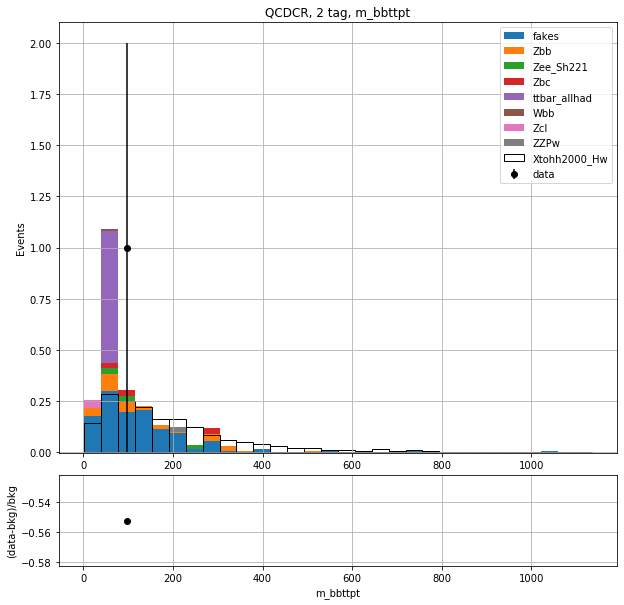

In [7]:
regions = ["SR", "QCDCR"]
tags = [0,1,2]
features = list(df_base.columns)


features.remove('sample')
features.remove('m_region')
features.remove('EventWeight')
features.remove('EventNumber')
features.remove('m_FJNbtagJets')

#features = ['m_hhm','m_FJphi']#, 'm_FJm']#, 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm']
signal = "Xtohh2000_Hw"

for region in regions:
    for tag in tags:
        df = df_base[df_base["m_region"] == region]
        df = df[df["m_FJNbtagJets"] == tag]
        print("-->df.shape", df.shape)
        for feature in features:
            print(":::", region, tag, feature)
            df0 = df[['sample',feature,"EventWeight"]] # taking only three columns
            df1 = df0[df0["sample"]!="data"] # taking without data, (PERO TIENEN SIGNAL!!)
            df_data = df0[df0["sample"]=="data"] # taking only data
            df_signal = df0[df0["sample"]==signal] # taking only signal
            signal_weights = df_signal["EventWeight"].values
            df1 = df1[df1["sample"]!=signal] #taking only background
            hmin=df0[feature].values.min()
            hmax=df0[feature].values.max()
            
            print("df_data.shape", df_data.shape)
            print("df_signal.shape", df_signal.shape)
            d = df1["sample"].value_counts()
            
            stack_list, weights_list, names = get_stacks(d,feature)
            
            get_histogram(region,str(tag), feature, hmin, hmax, stack_list, weights_list, names,
                          df_signal[feature].values,signal_weights, signal, df_data[feature].values)
